<a href="https://colab.research.google.com/github/amaraaabn/bike_buyers/blob/main/output_bike_buyers__updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

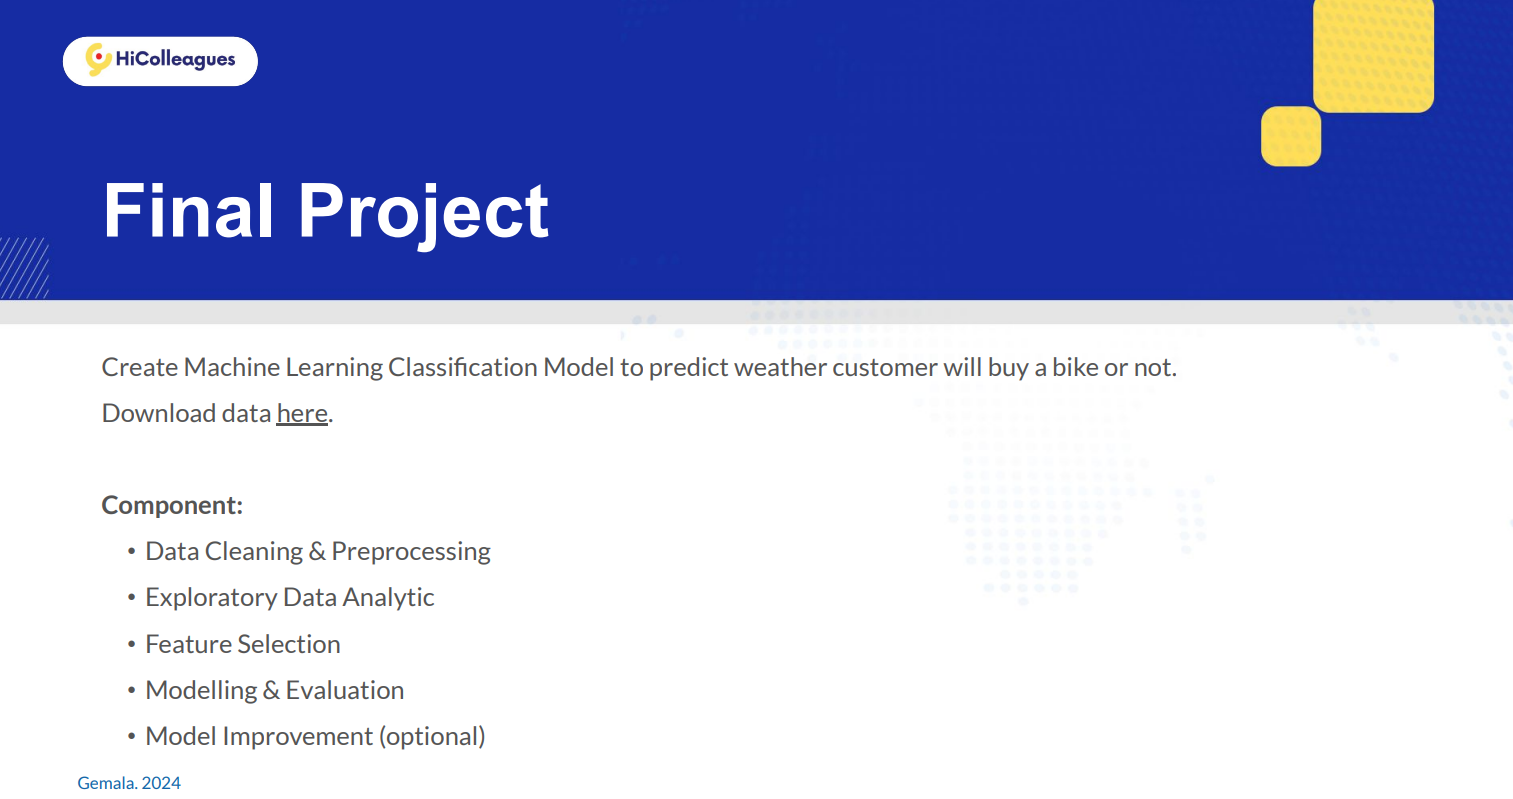

In [2]:
import pandas as pd
import numpy as np

from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import math
drive.mount('/content/drive')

Mounted at /content/drive


**Data Reference:** [bike_buyers _updated - bike_buyers _updated.csv](https://drive.google.com/file/d/1EuNuSMpmp82L_at0_Kbj5aornDD0uOeQ/view?usp=sharing)

In [143]:
path = '/content/drive/MyDrive/Python For Data Science Batch 4 - 2025W03/bike_buyers _updated - bike_buyers _updated.csv'
df_ori = pd.read_csv(path)
df_ori

,Unnamed: 0,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,1,24107,Married,Males,30000.0,3.0,partial college,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,2,14177,Married,Male,80000.0,5.0,partial/college,professional,No,2.0,2-5 Miles,Europe,60.0,No
3,3,24381,Single,NaN,70000.0,0.0,bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1295,21554,Single,Female,80000.0,0.0,bachelors,professional,No,3.0,10+ Miles,Pacific,33.0,No
1296,1296,13961,Married,Females,80000.0,5.0,graduate/degree,management,Yes,3.0,0-1 Miles,Pacific,40.0,No
1297,1297,19291,Single,Females,10000.0,2.0,High School,Manual,Yes,0.0,0-1 Miles,Europe,35.0,No
1298,1298,22936,Single,Female,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,Pacific,45.0,Yes


In [144]:
df = df_ori.copy()
print('Data shape:',df.shape,'\n')
df.info()

Data shape: (1300, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1300 non-null   int64  
 1   ID                1300 non-null   int64  
 2   Marital Status    1290 non-null   object 
 3   Gender            1287 non-null   object 
 4   Income            1290 non-null   float64
 5   Children          1288 non-null   float64
 6   Education         1300 non-null   object 
 7   Occupation        1300 non-null   object 
 8   Home Owner        1295 non-null   object 
 9   Cars              1289 non-null   float64
 10  Commute Distance  1300 non-null   object 
 11  Region            1300 non-null   object 
 12  Age               1291 non-null   float64
 13  Purchased Bike    1300 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 142.3+ KB


In [145]:
df.describe()

,Unnamed: 0,ID,Income,Children,Cars,Age
count,1300.000000,1300.000000,1290.000000,1288.000000,1289.000000,1291.000000
mean,649.500000,19915.485385,56434.108527,1.958075,1.458495,44.358637
std,375.421985,5343.081111,30807.554755,1.633406,1.124277,11.343097
min,0.000000,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,324.750000,15209.000000,30000.000000,0.000000,1.000000,36.000000
50%,649.500000,19655.000000,60000.000000,2.000000,1.000000,43.000000
75%,974.250000,24381.000000,70000.000000,3.000000,2.000000,52.000000
max,1299.000000,29447.000000,170000.000000,5.000000,4.000000,89.000000


Column 'Unnamed: 0' and 'ID' shows sequence of random number that indicate index and customer ID. These columns doesn't contains useful information for modeling purposes and will be dropped in future analysis.

The descriptive analysis reveals a low difference between the mean and median, indicating that the data is relatively symmetrical and not heavily skewed.

Based on the interquartile range, the 'Children' and 'Cars' columns show a narrow range, which makes sense because the number of children and cars per customer is likely limited and doesn’t vary drastically.

On the other hand, Income and Age exhibit a high degree of variation, suggesting a diverse sample with a broad range of socioeconomic backgrounds and life stages.

##Transforming Dataset into Designated Format

In [146]:
# storing original data into new dataframe to be easily accessed if needed for future analysis or reference
df = df_ori.copy()


# removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

# converting 'ID' into string
'''this column indicate a key, not integer'''
df['ID'] = df['ID'].astype(str)


# print converted dataframe
print(df.info(),'\n')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1300 non-null   object 
 1   Marital Status    1290 non-null   object 
 2   Gender            1287 non-null   object 
 3   Income            1290 non-null   float64
 4   Children          1288 non-null   float64
 5   Education         1300 non-null   object 
 6   Occupation        1300 non-null   object 
 7   Home Owner        1295 non-null   object 
 8   Cars              1289 non-null   float64
 9   Commute Distance  1300 non-null   object 
 10  Region            1300 non-null   object 
 11  Age               1291 non-null   float64
 12  Purchased Bike    1300 non-null   object 
dtypes: float64(4), object(9)
memory usage: 132.2+ KB
None 



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Males,30000.0,3.0,partial college,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,partial/college,professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


**Avoiding duplication for categorical data**

For categorical columns, it is likely to have duplication due to different string formating. This phenomena usually happen in the data collection event. One of the way to resolve it is to put all values into same format, and delete unnecessary special characters.

In [147]:
# Pre-Cleaning categorical
'''preventing duplication due to improper string format'''
cat_col = df.select_dtypes(include='object')    # 'ID' will be included since it has been converted to string
for col in cat_col:
  df[col] = df[col].apply(lambda x: x.strip().lower() if pd.notna(x) else x)

# checking unique values of categorical data
for col in cat_col:
  if col != 'ID':
    print(f'Columns: {col}\n{df[col].dropna().drop_duplicates().values}\n\n')


Columns: Marital Status
['married' 'single']


Columns: Gender
['female' 'males' 'male' 'females' 'nans']


Columns: Education
['bachelors' 'partial college' 'partial/college' 'high school'
 'partial/high/school' 'high/school' 'partial high school'
 'graduate degree' 'graduate/degree']


Columns: Occupation
['skilled manual' 'clerical' 'professional' 'manual' 'management'
 'skilled-manual']


Columns: Home Owner
['yes' 'no']


Columns: Commute Distance
['0-1 miles' '2-5 miles' '5-10 miles' '1-2 miles' '10+ miles']


Columns: Region
['europe' 'pacific' 'north america']


Columns: Purchased Bike
['no' 'yes']




**We will replace slash ('/') with space (' ')**
>`Education` columns contains values that seems similar, for example
>> 'high school' and 'high/school', 'graduate degree' and 'graduate/degree'

>`Occupation` columns contains values that seems similar, that is
>> 'skilled manual' and 'skilled-manual'



**We will replace 'nans' string with `np.nan` values**
>`Gender` columns has weird values:
>> 'nans' as string value. Assuming that this value indicates null value in a string form\
>> 'male', 'female' with 'males' and 'females'. These two indicating same meaning, so we will replace 's' into '' (blank value)


In [148]:
# replace string value
df['Education'] = df['Education'].str.replace('/',' ')
df['Occupation'] = df['Occupation'].str.replace('-',' ')

# replace 'nans' string
df['Gender'] = np.where(
    df['Gender'] == 'nans',np.nan, df['Gender']
)
df['Gender'] = df['Gender'].str.replace('s','')

# Double check the transformed categorical columns
for col in ['Education','Occupation','Gender']:
  if col != 'ID':
    print(f'Columns: {col}\n{df[col].dropna().drop_duplicates().values}\n\n')


Columns: Education
['bachelors' 'partial college' 'high school' 'partial high school'
 'graduate degree']


Columns: Occupation
['skilled manual' 'clerical' 'professional' 'manual' 'management']


Columns: Gender
['female' 'male']




**Parameter Remark**

Assuming that
> `Children` = Number of children owned by each ID\
> `Cars` = Number of cars owned by each ID\
> `Age` = Age of each corresponding ID

So intuitively, the value must be **integer**, as they represent countable quantities, and not decimal values.

In [149]:
# @title Number of Null Rows

# column that contains at least 1 null value
print('\033[1mColumns that has null value:\n\033[0m',df.isnull().sum()[df.isnull().sum()>0],'\n\n')

# shows dataframe that has at least 1 null value in any columns
print(f'\033[1mIn total, there are {len(df[df.isnull().any(axis=1)])} out of {len(df)} rows that contains at least 1 null value in any column ({round(len(df[df.isnull().any(axis=1)])/len(df)*100,2)}%)\n\033[0m')
df[df.isnull().any(axis=1)]

Columns that has null value:
 Marital Status    10
Gender            17
Income            10
Children          12
Home Owner         5
Cars              11
Age                9
dtype: int64 


In total, there are 66 out of 1300 rows that contains at least 1 null value in any column (5.08%)



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
3,24381,single,NaN,70000.0,0.0,bachelors,professional,yes,1.0,5-10 miles,pacific,41.0,yes
6,27974,single,male,160000.0,2.0,high school,management,NaN,4.0,0-1 miles,pacific,33.0,yes
8,22155,NaN,male,20000.0,2.0,partial high school,clerical,yes,2.0,5-10 miles,pacific,58.0,no
9,19280,married,male,NaN,2.0,partial college,manual,yes,1.0,0-1 miles,europe,NaN,yes
12,11434,married,male,170000.0,5.0,partial college,professional,yes,NaN,0-1 miles,europe,55.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,18626,single,male,40000.0,2.0,partial college,clerical,yes,NaN,1-2 miles,europe,33.0,yes
1222,17926,NaN,female,NaN,0.0,bachelors,clerical,no,0.0,0-1 miles,pacific,28.0,yes
1239,11434,married,male,170000.0,5.0,partial college,professional,yes,NaN,0-1 miles,europe,55.0,no
1257,26778,single,female,40000.0,NaN,high school,skilled manual,yes,2.0,5-10 miles,north america,31.0,no


## **Handling Null Value**


In [150]:
# @title List of null columns
null_col = df.isnull().sum()[df.isnull().sum()>0].index
null_col

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Home Owner', 'Cars',
       'Age'],
      dtype='object')

In [151]:
# @title Handling Categorical Columns
'''Fill null value with mode'''
fillna_cat_col = [i for i in null_col if i in df.select_dtypes(include='object')]
print(f'Categorical columns that we will the null value: {fillna_cat_col}')

for col in fillna_cat_col:
  mode = df[col].mode()[0]
  df[col] = df[col].fillna(mode)

Categorical columns that we will the null value: ['Marital Status', 'Gender', 'Home Owner']


Numerical columns that we will the null value: ['Income', 'Children', 'Cars', 'Age']



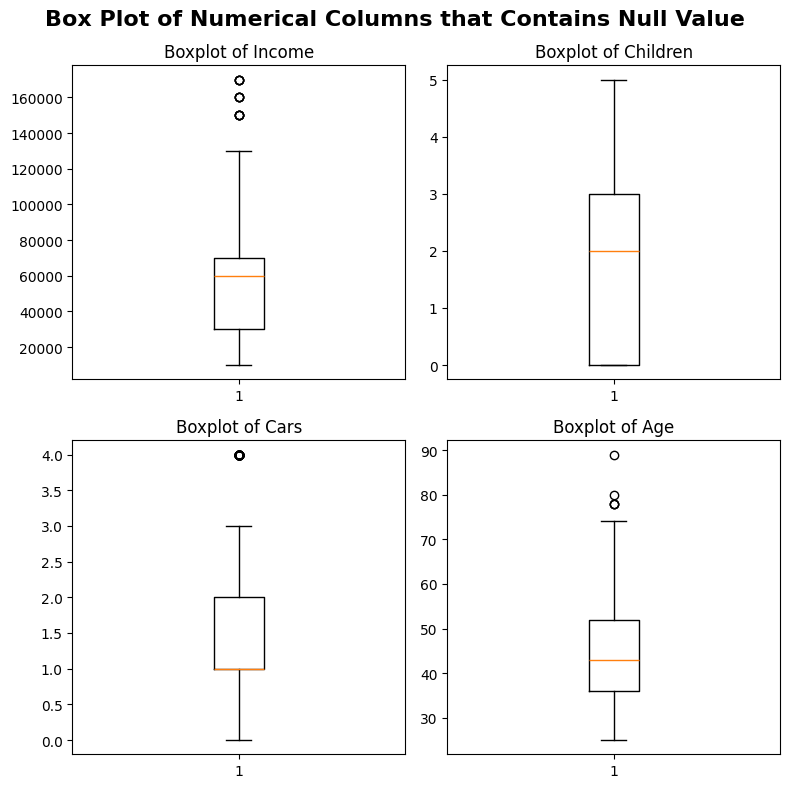

In [152]:
# @title Handling Numerical Columns
fillna_cat_col = [i for i in null_col if i in df.select_dtypes(exclude='object')]
print(f'Numerical columns that we will the null value: \033[1m{fillna_cat_col}\n\033[0m')

'''Creating boxplot to see the data spread'''
fig, ax = plt.subplots(2, 2, figsize=(8,8))
ax = ax.flatten()

for i, col in enumerate(fillna_cat_col):
  num = df[~pd.isna(df[col])][col]
  ax[i].boxplot(num)
  ax[i].set_title(f'Boxplot of {col}')

plt.suptitle('Box Plot of Numerical Columns that Contains Null Value',fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

'''Handle null value using mean'''
## Income
income_med = df['Income'].mean()
df['Income'] = df['Income'].fillna(income_med)
## Age
age_med = int(df['Age'].mean())
df['Age'] = df['Age'].fillna(age_med)


'''Handle null value using median'''
## Children
children_med = df['Children'].median()
df['Children'] = df['Children'].fillna(children_med)

# Cars
cars_med = df['Cars'].median()
df['Cars'] = df['Cars'].fillna(cars_med)

#Exploratory Data Analysis (EDA)

In [153]:
# print data head and data info to see the overall data
print(df.info(),'\n')
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1300 non-null   object 
 1   Marital Status    1300 non-null   object 
 2   Gender            1300 non-null   object 
 3   Income            1300 non-null   float64
 4   Children          1300 non-null   float64
 5   Education         1300 non-null   object 
 6   Occupation        1300 non-null   object 
 7   Home Owner        1300 non-null   object 
 8   Cars              1300 non-null   float64
 9   Commute Distance  1300 non-null   object 
 10  Region            1300 non-null   object 
 11  Age               1300 non-null   float64
 12  Purchased Bike    1300 non-null   object 
dtypes: float64(4), object(9)
memory usage: 132.2+ KB
None 



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,married,female,40000.0,1.0,bachelors,skilled manual,yes,0.0,0-1 miles,europe,42.0,no
1,24107,married,male,30000.0,3.0,partial college,clerical,yes,1.0,0-1 miles,europe,43.0,no
2,14177,married,male,80000.0,5.0,partial college,professional,no,2.0,2-5 miles,europe,60.0,no
3,24381,single,male,70000.0,0.0,bachelors,professional,yes,1.0,5-10 miles,pacific,41.0,yes
4,25597,single,male,30000.0,0.0,bachelors,clerical,no,0.0,0-1 miles,europe,36.0,yes


**Data Spread**

In [163]:
# Numerical Columns
num_col = df.select_dtypes(exclude='object').columns
cat_col = df.select_dtypes(include='object').columns[1:]    #excluding ID
print(f'\033[1mNumerical Columns:\033[0m {list(num_col)}')
print(f'\033[1mCategorical Columns:\033[0m {list(cat_col)}')


Numerical Columns: ['Income', 'Children', 'Cars', 'Age']
Categorical Columns: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']


In [164]:
# data describe for numberical columns
df.describe()

,Income,Children,Cars,Age
count,1300.000000,1300.000000,1300.000000,1300.000000
mean,56434.108527,1.958462,1.454615,44.356154
std,30688.743843,1.625849,1.120294,11.303773
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,36.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


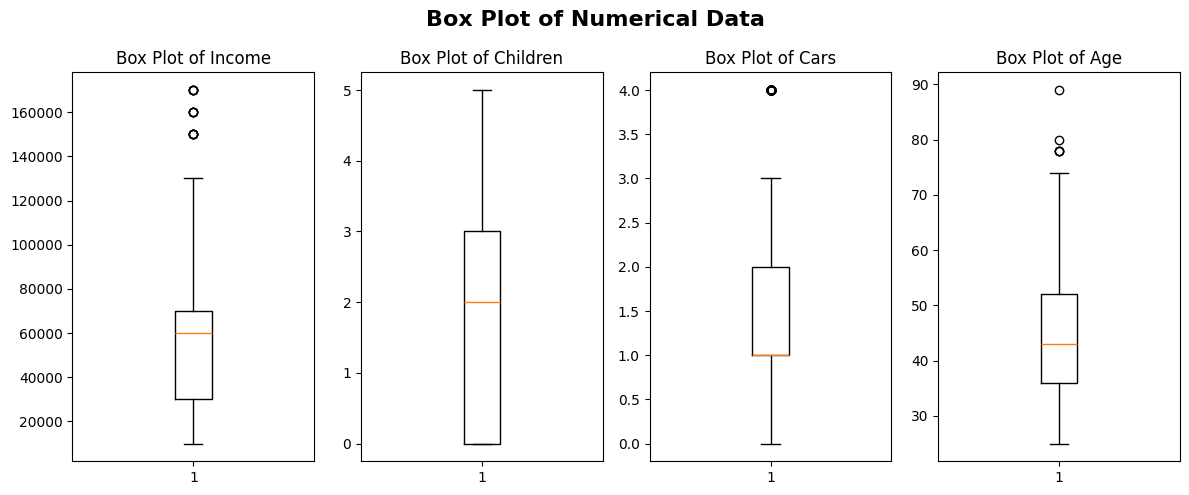

In [165]:
# @title Box Plot of Numerical Columns

#defining numerical columns
num_col = df.select_dtypes(exclude='object').columns

#creating box plot
fig, ax = plt.subplots(1,4, figsize=(12,5))
ax = ax.flatten()

for i, col in enumerate(num_col):
  ax[i].boxplot(df[col])
  ax[i].set_title(f'Box Plot of {col}')

plt.suptitle('Box Plot of Numerical Data', fontsize = 16, fontweight='bold')
plt.subplots_adjust(top= 1)

plt.tight_layout()
plt.show()

From the boxplot, we can see the presence of outlier, which we will be adress in the subsequent steps of our analysis.

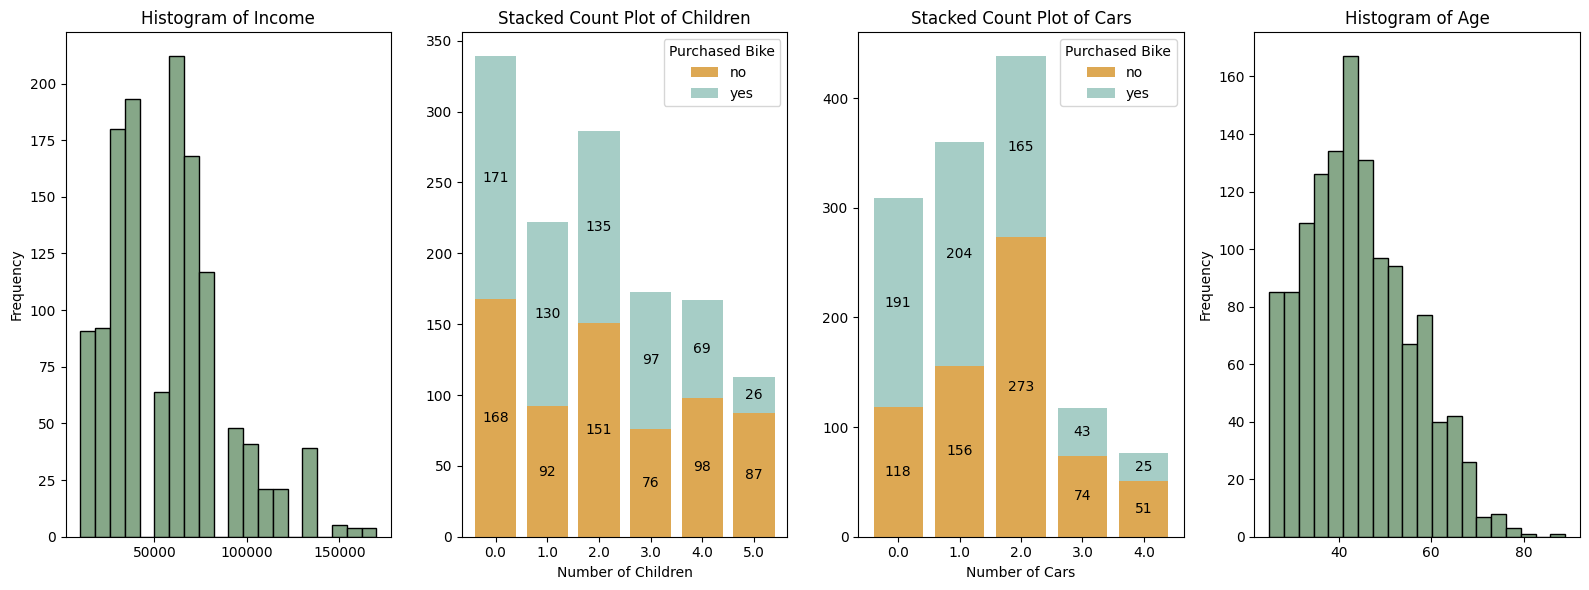

In [166]:
# @title **Count Plot of Numerical Column**

# Define colors for 'Yes' and 'No'
colors = {'Yes': '#A6CDC6', 'No': '#DDA853'}

# Create a figure and axes for subplots (2 plots in 1 row)
fig, ax = plt.subplots(1, 4, figsize=[16, 6])

# Loop through the columns to plot for 'Children' and 'Cars'
for i, col in enumerate(num_col):
  if col in ['Income','Age']:
    ax[i].hist(df[col], bins = 20, color='#86A788', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}')
    ax[i].set_ylabel('Frequency')
  else:
    # Plot stacked bar plot for each column (Children or Cars)
    df.groupby([col, 'Purchased Bike']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, ax=ax[i],
                                                                           color=[colors['No'], colors['Yes']], width=0.8)

    # Adding value labels on each bar segment (for both Yes and No)
    for p in ax[i].patches:
        height = p.get_height()
        if height > 0:  # Only annotate if there is a value
            # Get the cumulative height of the stacked segments
            bottom = p.get_y() + height / 2  # Midpoint of the stack
            ax[i].annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., bottom),
                           ha='center', va='center',
                           fontsize=10, color='black')  # Value label color

    # Set axis labels and title for each subplot
    ax[i].set_xlabel(f'Number of {col}')
    ax[i].set_title(f'Stacked Count Plot of {col}')
    ax[i].tick_params(axis='x', rotation=0)  # Keeps x labels horizontal

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

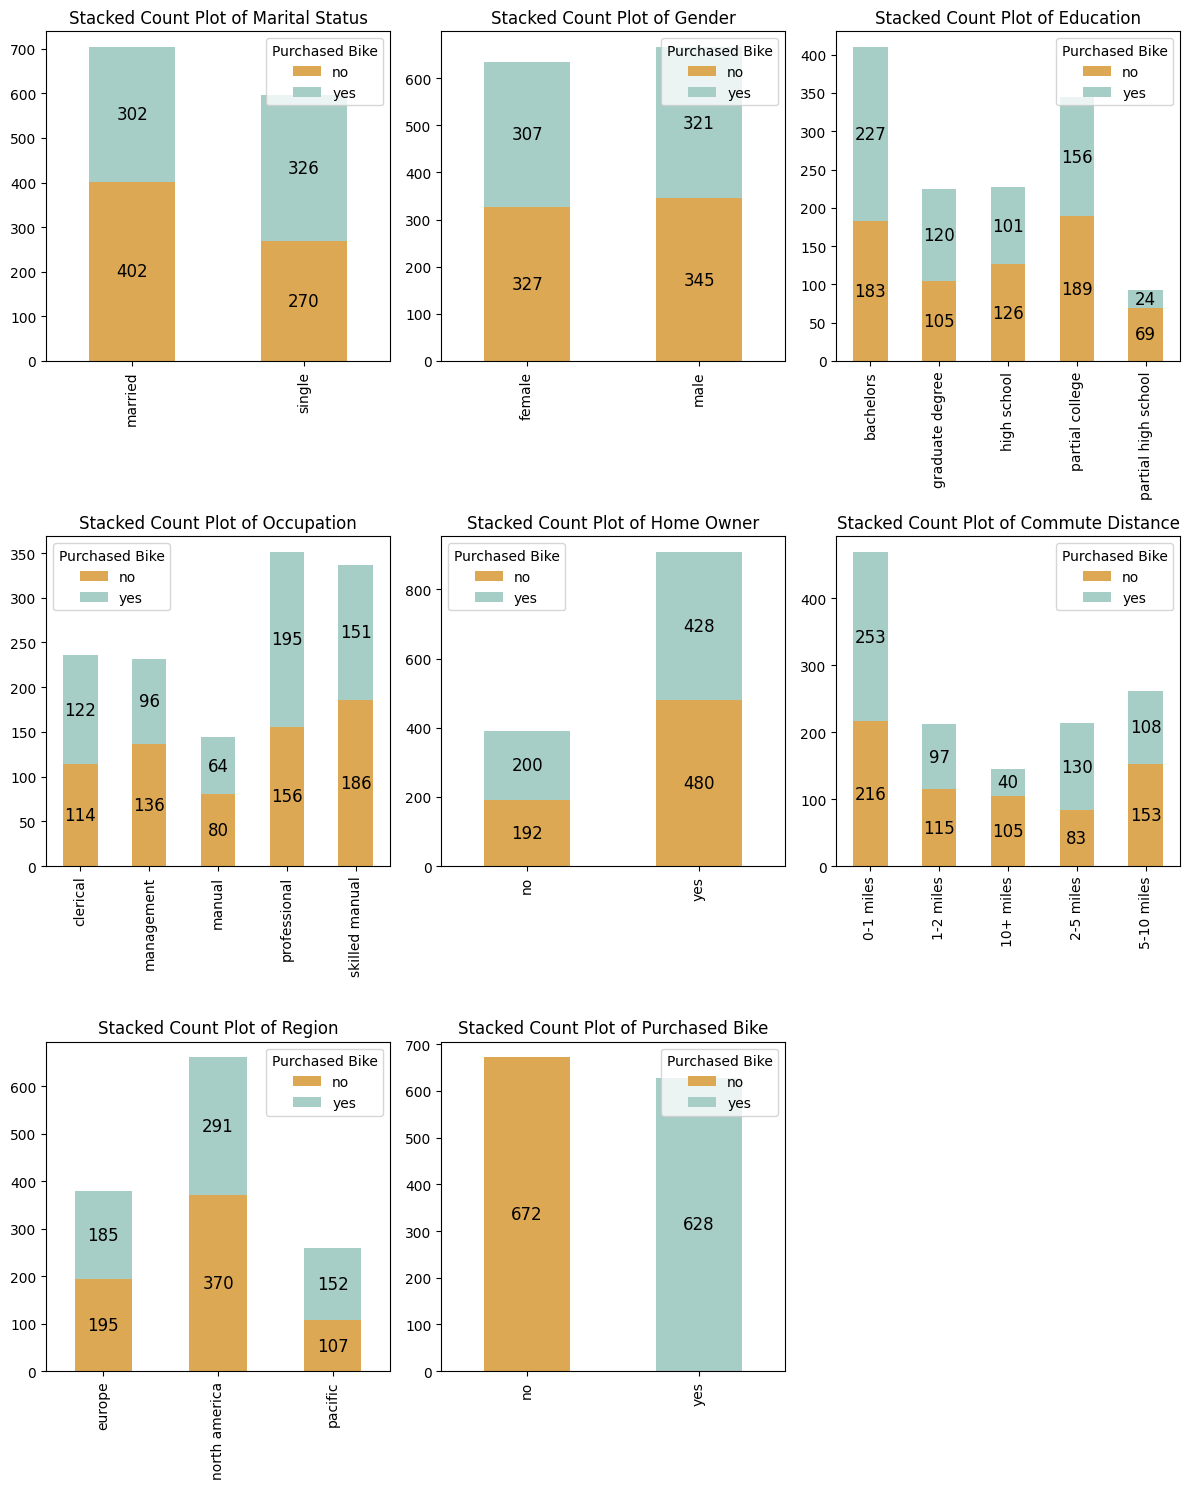

In [167]:
# @title **Count Plot of Categorical Column**
cat_col = df.iloc[:,1:].select_dtypes(include='object').columns   #exluding the `ID` column


# define colors for 'Yes' and 'No'
colors = {'Yes': '#A6CDC6', 'No': '#DDA853'}

fig, ax = plt.subplots(3, 3, figsize=[12, 15])
ax = ax.flatten()

# Loop through the columns
for i, col in enumerate(cat_col):
    # plot stacked bar plot
    df.groupby([col, 'Purchased Bike']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, ax=ax[i],
                                                                           color=[colors['No'], colors['Yes']], width=0.5)

    # add value labels
    for p in ax[i].patches:
        height = p.get_height()
        if height > 0:  # Only annotate if there is a value
            # Get the cumulative height of the stacked segments
            bottom = p.get_y() + height / 2  # Midpoint of the stack
            ax[i].annotate(f'{int(height)}',
                           (p.get_x() + p.get_width() / 2., bottom),
                           ha='center', va='center',
                           fontsize=12, color='black')  # Value label color

    # Set axis and title labels
    ax[i].set_xlabel(f'')
    ax[i].set_title(f'Stacked Count Plot of {col}')
    ax[i].tick_params(axis='x', rotation=90)  # rotate xlabel

# deleting blank plot
if len(ax) > len(cat_col) :
  res = len(ax) - len(cat_col)
  init = len(ax)-1
  while res >0:
    ax[init].axis('off')
    res -= 1
    init -= 1


#plt.suptitle('Count Plot of Categorial Columns', fontsize= 16,fontweight = 'bold')
#plt.subplots_adjust(top=2)

plt.tight_layout()
plt.show()

## **Intuitive Analysis**

The sample predominantly comes from North America, with balanced proportions in terms of gender, marital status, and bike purchase history.

The distribution of "Buy" (yes) and "Not Buy" (no) responses across the features appears well-balanced, without any significant bias in either direction. This is a good sign for future modeling, as it helps ensure the model won't be overly influenced by any one group.



- **Potential Buyer**
> Over 70% of the sample consists of homeowners, suggesting an upper-middle-class financial profile. This group may have the financial means to afford a bike, making them a promising segment for potential buyers.
> 845 of the sample have a commute distance of less than 5 miles, which is a distance that can easily be covered by bike, making them likely candidates for potential buyers.

- **Selling Challenge**
>For customers that already purchased bike
>>If the bike’s quality is considered very good, these customers may be willing to repurchasing or upgrading. However, if the bike quality is consider as average, it may be challenging for these customers to be our potential buyer.

>>For customers that doesn't has purchased bike history
>>>There is a great opportunity to target those who have not yet bought a bike, especially if cycling is currently a lifestyle trend.\
>>>However, if the price range is high, it could be a challenge to convert these customer group into buyers.


##Label Encoding

**Overall Plan**

For categorical columns that contain only two unique values (e.g., 'Gender', 'Marital Status', etc.), we will convert them into a binary format for ease of analysis.

For other categorical columns with more than two unique values, we will use the `LabelEncoder()` library to convert them into numerical values.

The encoded values will be stored in new columns to preserve the original data.

In [168]:
# Binary Categorical Columns
bin_col = [value for index, value in enumerate(cat_col) if df[value].nunique() == 2]
print(f'Columns that will be coverted into 1 and 0 value: {bin_col}')

df['Marital Status_encod'] = np.where(df['Marital Status'] == 'married', 1, 0)
df['Gender_encod'] = np.where(df['Gender'] == 'female',1,0 )
df['Home Owner_encod'] = np.where(df['Home Owner'] == 'yes', 1,0)
df['Purchased Bike_encod'] = np.where(df['Purchased Bike'] == 'yes', 1,0)

# Convert 'Commute Distance' Column
'''Special case for "Commute Distance" columns, I will set the encoded label by distance sort'''
distance_sort = ['0-1 miles', '1-2 miles', '2-5 miles', '5-10 miles', '10+ miles']
print(f"Column 'Commute Distance' is labeled by order: {distance_sort}")

df['Commute Distance_encod'] = df['Commute Distance'].apply(lambda x: distance_sort.index(x))

# Converting using LabelEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

labelencoder_col = [value for value in cat_col if value not in bin_col and value != 'Commute Distance']
print(f'Columns that will be coverted using LabelEncoder(): {labelencoder_col}')
for col in labelencoder_col:
  df[f'{col}_encod'] = le.fit_transform(df[col])



Columns that will be coverted into 1 and 0 value: ['Marital Status', 'Gender', 'Home Owner', 'Purchased Bike']
Column 'Commute Distance' is labeled by order: ['0-1 miles', '1-2 miles', '2-5 miles', '5-10 miles', '10+ miles']
Columns that will be coverted using LabelEncoder(): ['Education', 'Occupation', 'Region']


##**Correlation Matrix & Pair Plot**

In [169]:
# @title Correlation Value
num_col = df.select_dtypes(exclude='object').columns
corr_matrix = df[num_col].corr()
corr_matrix #show output

,Income,Children,Cars,Age,Marital Status_encod,Gender_encod,Home Owner_encod,Purchased Bike_encod,Commute Distance_encod,Education_encod,Occupation_encod,Region_encod
Income,1.000000,0.269413,0.427344,0.165240,0.089023,-0.058367,0.016743,0.040832,0.221348,-0.225014,0.146104,0.271925
Children,0.269413,1.000000,0.286787,0.520758,0.124668,0.001264,0.152346,-0.125890,0.174976,-0.048408,0.028187,0.075587
Cars,0.427344,0.286787,1.000000,0.191764,-0.024882,-0.064899,-0.061054,-0.206872,0.369912,0.161312,0.058113,0.247132
Age,0.165240,0.520758,0.191764,1.000000,0.196915,-0.008281,0.098588,-0.100357,0.252585,-0.085552,-0.164860,0.073093
Marital Status_encod,0.089023,0.124668,-0.024882,0.196915,1.000000,-0.102957,0.290251,-0.117662,-0.032008,-0.069217,0.059127,0.025607
Gender_encod,-0.058367,0.001264,-0.064899,-0.008281,-0.102957,1.000000,-0.012825,0.002246,-0.048339,0.006455,-0.034157,-0.084132
Home Owner_encod,0.016743,0.152346,-0.061054,0.098588,0.290251,-0.012825,1.000000,-0.035668,0.192869,-0.116465,0.006622,0.008476
Purchased Bike_encod,0.040832,-0.125890,-0.206872,-0.100357,-0.117662,0.002246,-0.035668,1.000000,-0.135380,-0.138489,0.002028,0.056383
Commute Distance_encod,0.221348,0.174976,0.369912,0.252585,-0.032008,-0.048339,0.192869,-0.135380,1.000000,0.066941,0.178417,0.301625
Education_encod,-0.225014,-0.048408,0.161312,-0.085552,-0.069217,0.006455,-0.116465,-0.138489,0.066941,1.000000,0.032153,-0.144717


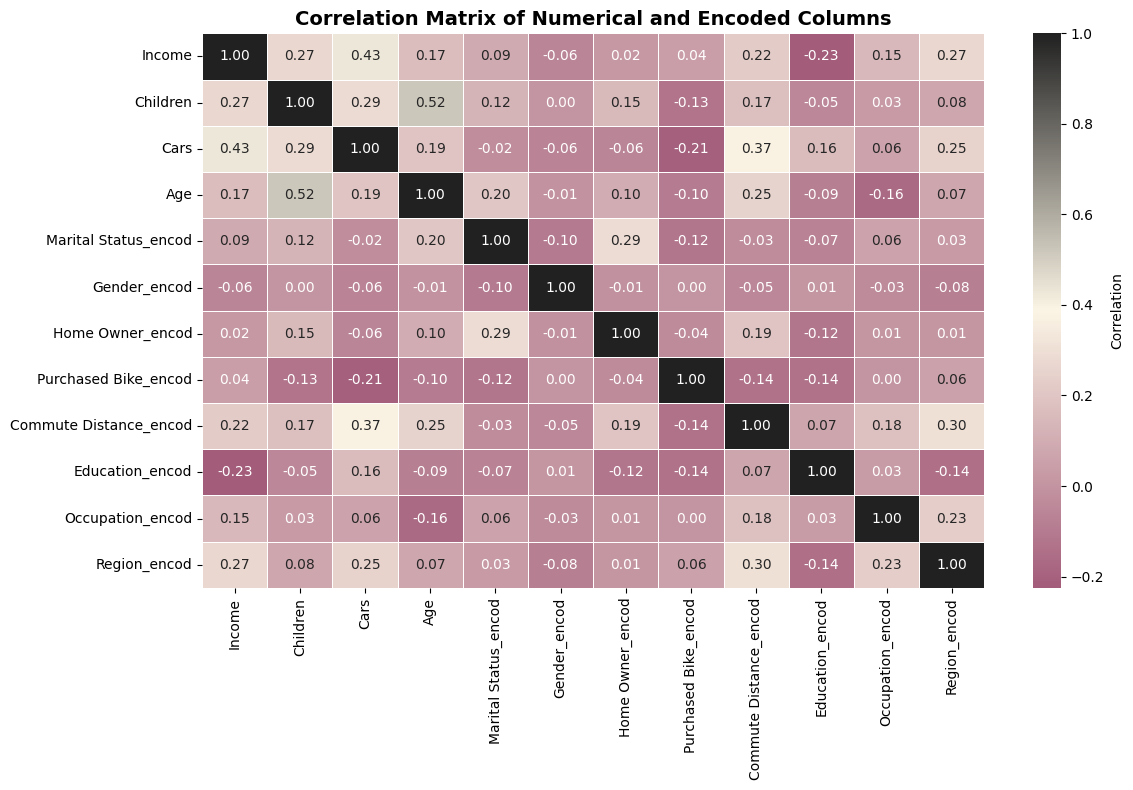

In [170]:
# @title Visualize using heatmap
plt.figure(figsize = (12,8))

# Choosing custom color scheme
from matplotlib.colors import LinearSegmentedColormap
colors = ['#A35C7A', '#FBF5E5', '#212121']
cmap = LinearSegmentedColormap.from_list("custom_palette", colors)


sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidth = 0.5, fmt = '.2f', cbar_kws={'label':'Correlation'}, annot_kws = {'size':10})
plt.title('Correlation Matrix of Numerical and Encoded Columns', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

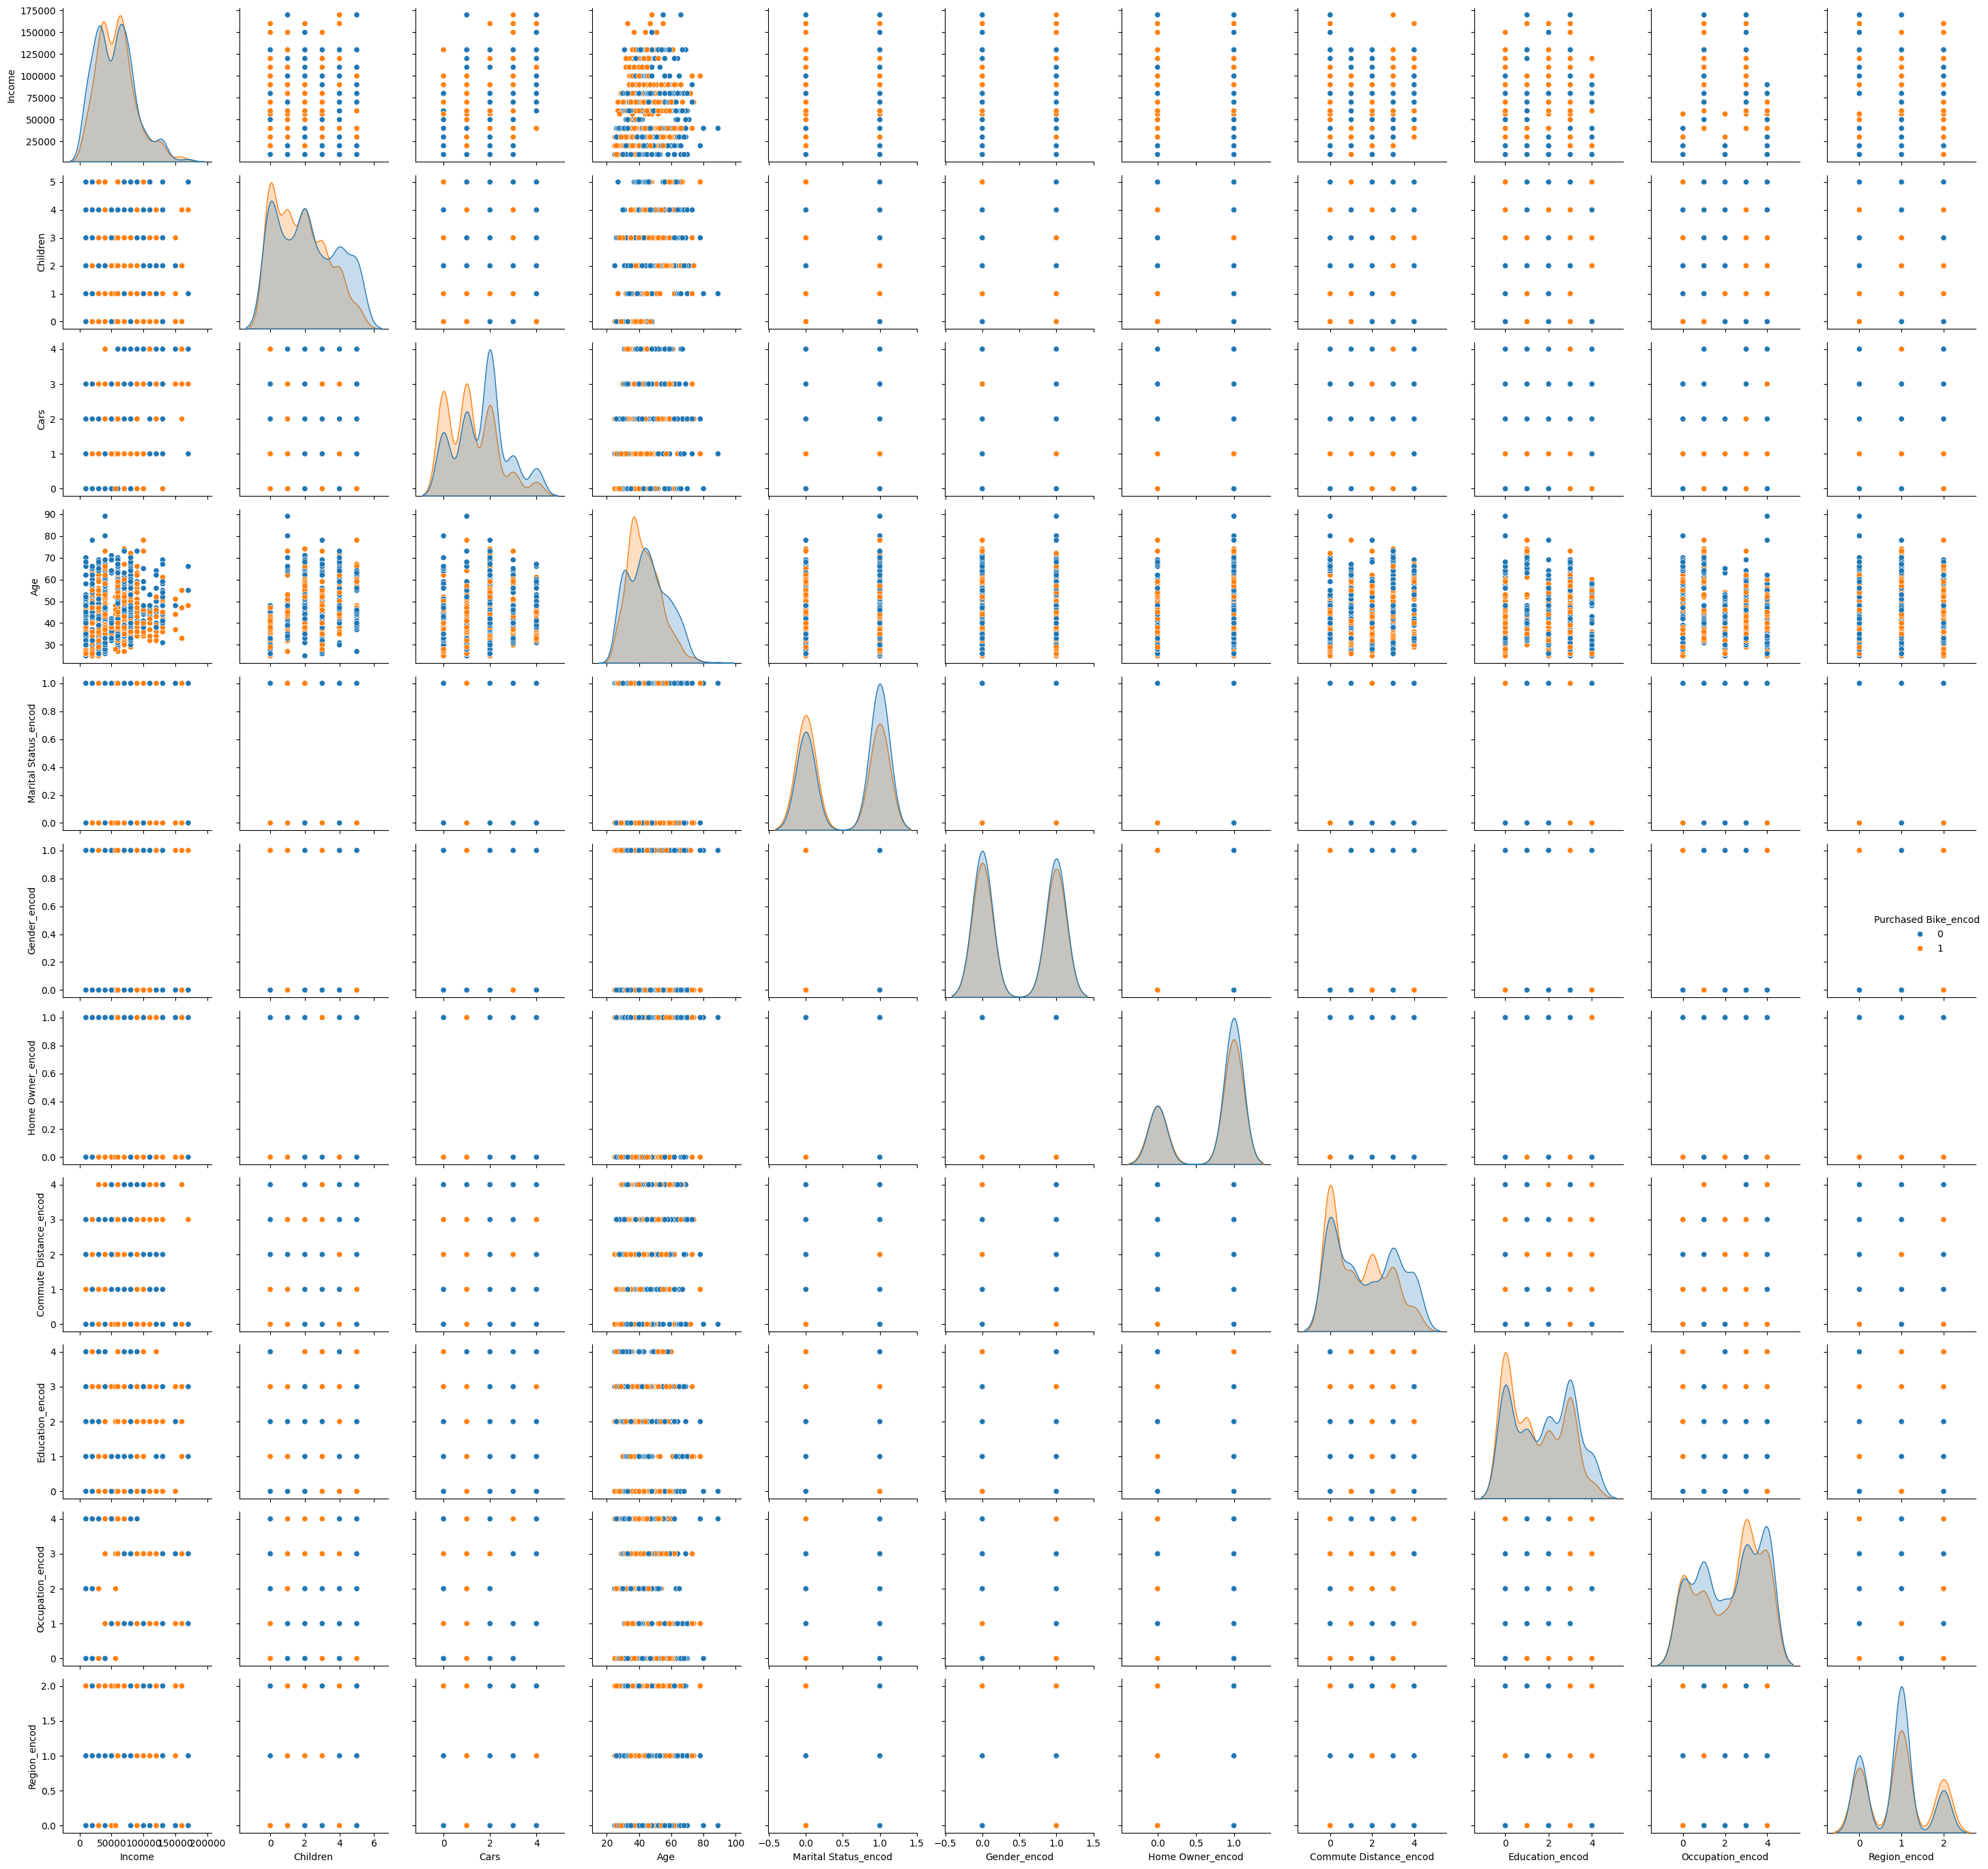

In [173]:
# @title **Pair Plot**
sns.pairplot(df, hue='Purchased Bike_encod')
plt.tight_layout()
plt.show()

# Handling Outlier

## Handling Outlier for Non-Encoded Columns


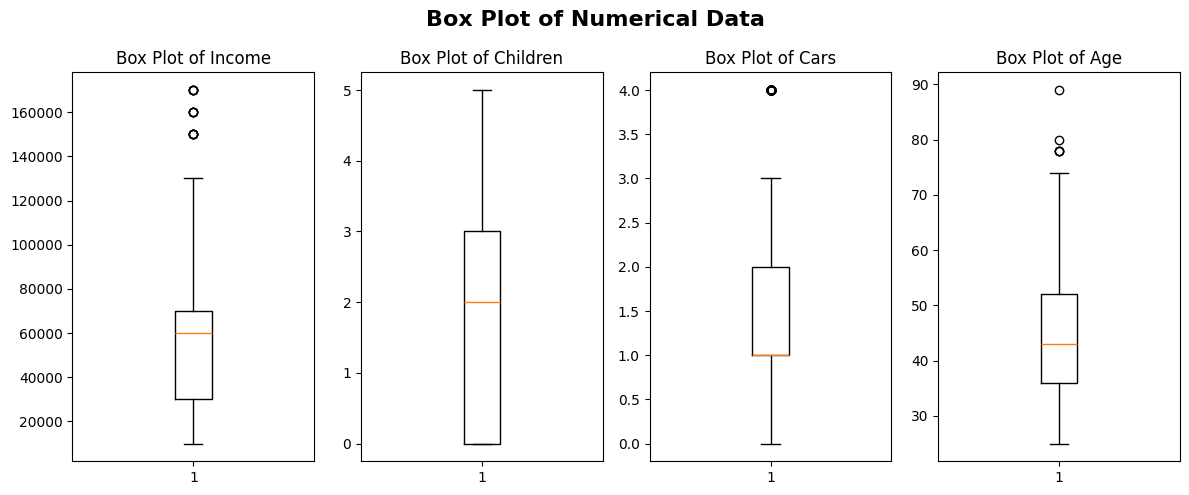

In [174]:
# @title Re-Showing Box Plot of Numerical Columns
'''We want to see the outlier occurence from the box plot'''

#defining numerical columns
num_col = df.select_dtypes(exclude='object').columns

#creating box plot
fig, ax = plt.subplots(1,4, figsize=(12,5))
ax = ax.flatten()

for i, col in enumerate(num_col[:4]):
  ax[i].boxplot(df[col])
  ax[i].set_title(f'Box Plot of {col}')

plt.suptitle('Box Plot of Numerical Data', fontsize = 16, fontweight='bold')
plt.subplots_adjust(top= 1)

plt.tight_layout()
plt.show()

From the plot above, `Children` doesn't seem has obvious outlier. So the columns that we will be handling are:
- Income
- Cars
- Age


In [179]:
# @title Defining Handling Outlier Method

def handling_outlier_winsorize(data, column, limits=([0.05,0.95])):
  if column == 'Income':
    low_lim = data[column].quantile(limits[0])
    hig_lim = data[column].quantile(limits[1])
  else:
    #making sure 'Age' and 'Cars' column has integer value
    low_lim = round(data[column].quantile(limits[0]),0)
    hig_lim = round(data[column].quantile(limits[1]),0)


  data[column] = np.clip(data[column], low_lim, hig_lim)
  return data

def handling_outlier_iqr(data, column, k = 1.5):
  desc =  data[column].describe()
  IQR = desc['75%'] - desc['25%']

  if column == 'Income':
    low_lim = desc['25%'] - k*IQR
    hig_lim = desc['75%'] + k*IQR
  else:
    #making sure 'Age' and 'Cars' column has integer value
    low_lim = round(desc['25%'] - k*IQR ,0)
    hig_lim = round(desc['75%'] + k*IQR,0)

  data[column] = np.clip(data[column], low_lim, hig_lim)
  return data

In [180]:
# @title Execution of Handling outlier
'''Put it into two different dataframe based on the method used
We want to see the performance difference in the future model
'''

cols = ['Income','Age','Cars']

df_handled_winsorize = df.copy()
for col in cols:
  df_handled_winsorize = handling_outlier_winsorize(df_handled_winsorize, col)

df_handled_cap = df.copy()
for col in cols:
  df_handled_cap = handling_outlier_iqr(df_handled_cap, col)

**Data Changes from Outlier Handling**

Boxplot is used to shows outlier occurence and the difference after the treatment.

From the treatment done,  there are no significant differences between the two outlier handling methods. Similarly, when examining the descriptive statistics, neither method shows any notable changes.

However, a closer comparison indicates that the Winsorization, method with a 5% limit, leads to a slight decrease in both the mean and standard deviation of the data.

**New Dataframe**
As a result, we now have two additional dataframes, each representing a different approach to outlier handling, stored in the following variables:
- `df_handled_winsorize` (using the Winsorization method)
- `df_handled_cap` (using the IQR method)

These dataframes allow for further analysis and comparison of the impact of outlier handling on model performance.

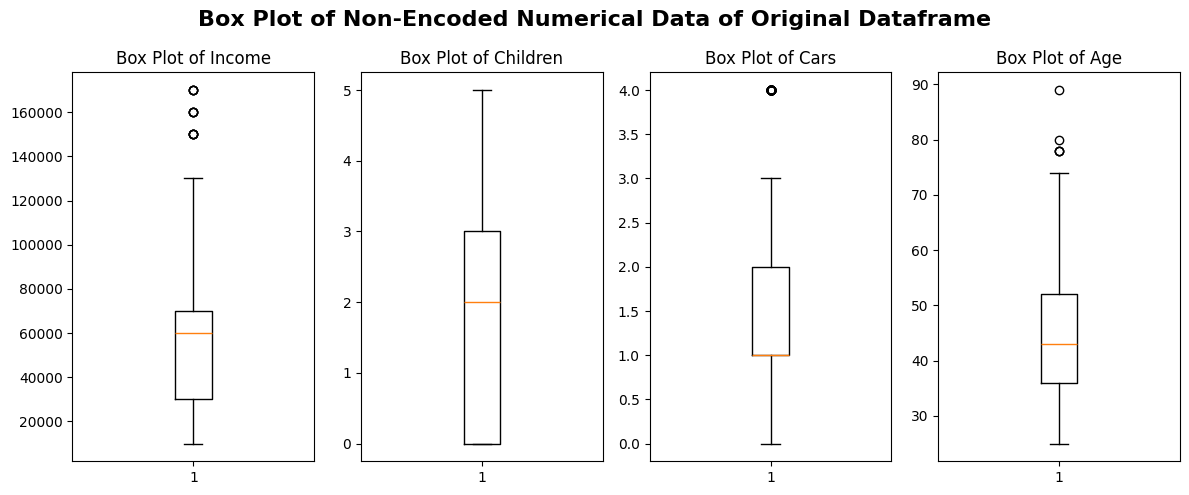

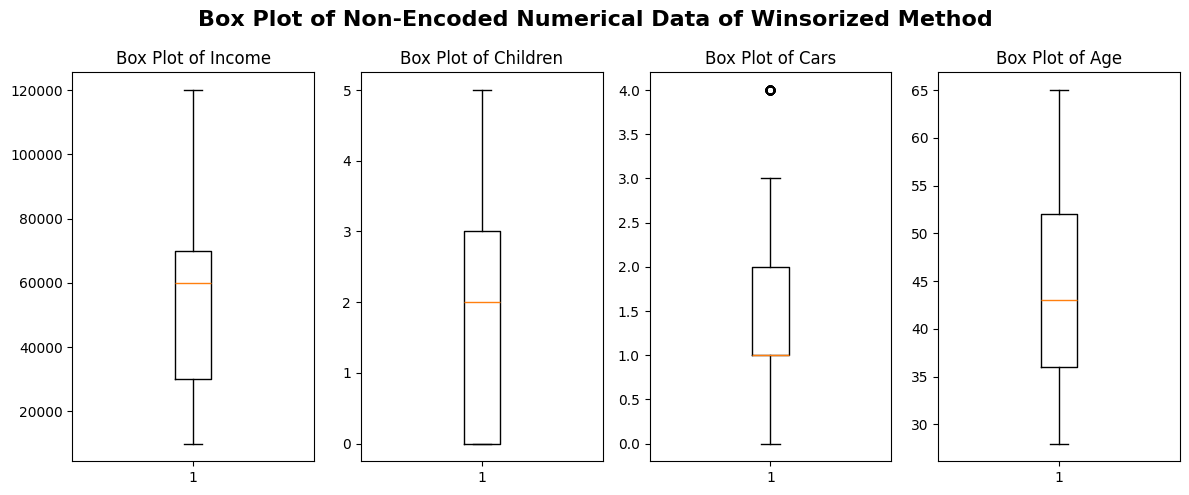

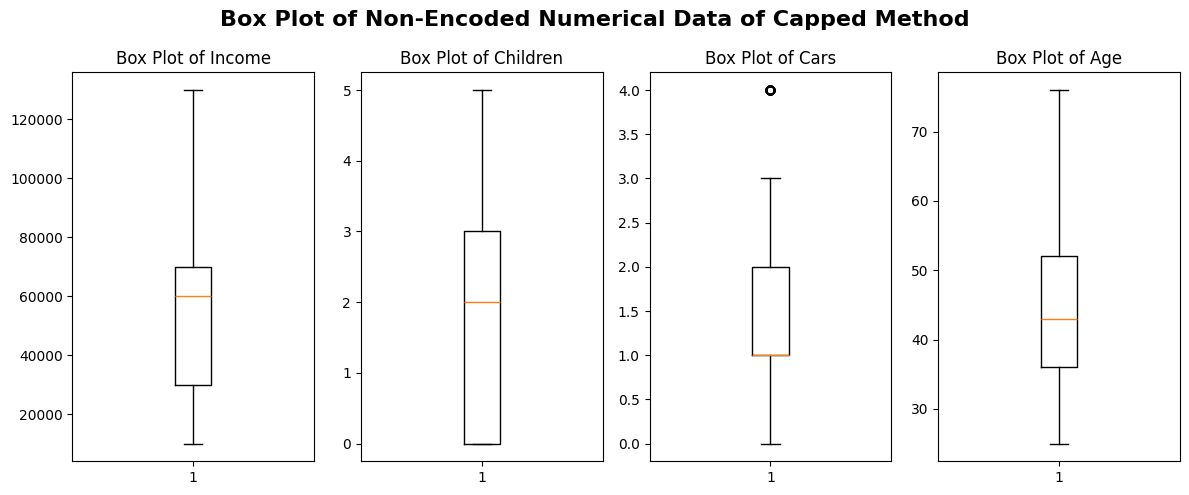

In [181]:
# @title **See Data Transformation after Handling Outlier**

dataframes = [df, df_handled_winsorize,df_handled_cap]
methods = ['Original Dataframe','Winsorized Method','Capped Method']

for idx, method in enumerate(methods):
  num_col = dataframes[idx].select_dtypes(exclude='object').columns

   #creating box plot
  fig, ax = plt.subplots(1,4, figsize=(12,5))
  ax = ax.flatten()

  for i, col in enumerate(num_col[:4]):
    ax[i].boxplot(dataframes[idx][col])
    ax[i].set_title(f'Box Plot of {col}')

  plt.suptitle(f'Box Plot of Non-Encoded Numerical Data of {method}', fontsize = 16, fontweight='bold')
  plt.subplots_adjust(top= 1)

  plt.tight_layout()
  plt.show()
  print('\n\n')



In [182]:
df.describe()

,Income,Children,Cars,Age,Marital Status_encod,Gender_encod,Home Owner_encod,Purchased Bike_encod,Commute Distance_encod,Education_encod,Occupation_encod,Region_encod
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,56434.108527,1.958462,1.454615,44.356154,0.541538,0.487692,0.698462,0.483077,1.539231,1.604615,2.246923,0.906923
std,30688.743843,1.625849,1.120294,11.303773,0.498463,0.500041,0.459103,0.499906,1.429104,1.353231,1.467046,0.695160
min,10000.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30000.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000
75%,70000.000000,3.000000,2.000000,52.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000
max,170000.000000,5.000000,4.000000,89.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000


In [183]:
df_handled_winsorize.describe()

,Income,Children,Cars,Age,Marital Status_encod,Gender_encod,Home Owner_encod,Purchased Bike_encod,Commute Distance_encod,Education_encod,Occupation_encod,Region_encod
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,55741.800835,1.958462,1.454615,44.210769,0.541538,0.487692,0.698462,0.483077,1.539231,1.604615,2.246923,0.906923
std,28881.580014,1.625849,1.120294,10.717818,0.498463,0.500041,0.459103,0.499906,1.429104,1.353231,1.467046,0.695160
min,10000.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30000.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000
75%,70000.000000,3.000000,2.000000,52.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000
max,120000.000000,5.000000,4.000000,65.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000


In [184]:
df_handled_cap.describe()

,Income,Children,Cars,Age,Marital Status_encod,Gender_encod,Home Owner_encod,Purchased Bike_encod,Commute Distance_encod,Education_encod,Occupation_encod,Region_encod
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,56141.800835,1.958462,1.454615,44.338462,0.541538,0.487692,0.698462,0.483077,1.539231,1.604615,2.246923,0.906923
std,29823.392723,1.625849,1.120294,11.247344,0.498463,0.500041,0.459103,0.499906,1.429104,1.353231,1.467046,0.695160
min,10000.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30000.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60000.000000,2.000000,1.000000,43.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,1.000000
75%,70000.000000,3.000000,2.000000,52.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000
max,130000.000000,5.000000,4.000000,76.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000


# **Data Modelling**

In [188]:
# @title Selecting Dataframes and Parameters For Model Comparison

'''We are going to compare the performance of multiple datasets and multiple model approach
First, data we will be using is:'''

# dataframes
datas = {'df':df,
         'df_handled_winsorize':df_handled_winsorize,
         'df_handled_iqr':df_handled_cap}

datas_map = {'df':'Original Dataframe',
             'df_handled_winsorize':'Winsorized Method Outlier Data Treatment',
             'df_handled_iqr':'Inter Quartile Method Outlier Data Treatment'}

# parameter selection
'''Onliy selecting parameters with ABS(Correlation_Value) >= 0.1
Assuming these parameters has high correlation value'''
corr_col = list(corr_matrix['Purchased Bike_encod'][corr_matrix['Purchased Bike_encod'].apply(lambda x: abs(x)>=0.1)].index)
'''All Numerical parameters included for the modesl'''
all_col = list(df.select_dtypes(exclude='object').columns)


par_select = {'corr_col':corr_col,
              'all_col': all_col}
par_select_map = {'corr_col':'Columns with abs(corr) >= 0.1',
                  'all_col':'All Columns'}

In [189]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# @title Defining Model and Creat Split Data Function


'''Logistic Regression Model'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)

'''Decision Tree Classifier Model'''
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

'''Random Forest Classifier Model'''
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

'''Pre-Modelling: Split Traind and Test Dataset'''
def splitting_train_test(dataframe_selected, columns_selected):
  from sklearn.model_selection import train_test_split

  # Defining predictor and response
  y_col = 'Purchased Bike_encod'
  y_data = dataframe_selected[y_col]   #respons

  x_col = [i for i in columns_selected if i != y_col]
  x_data = dataframe_selected[x_col]

  # Splitting Training and Test Data
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 2002) #set 80:20 ratio of train and test data
  return x_train, x_test, y_train, y_test

Model =  LogisticRegression(max_iter=1000) 


DATA: Original Dataframe
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[97 39]
 [49 75]]

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       136
           1       0.66      0.60      0.63       124

    accuracy                           0.66       260
   macro avg       0.66      0.66      0.66       260
weighted avg       0.66      0.66      0.66       260


Cross Validation Score: 
[0.62857143 0.6        0.7        0.62857143 0.65714286 0.65217391
 0.57971014 0.50724638 0.68115942 0.62318841 0.65217391 0.63768116
 0.5942029  0.63768116 0.60869565]

Average: 0.626, Standard Deviation: 0.044





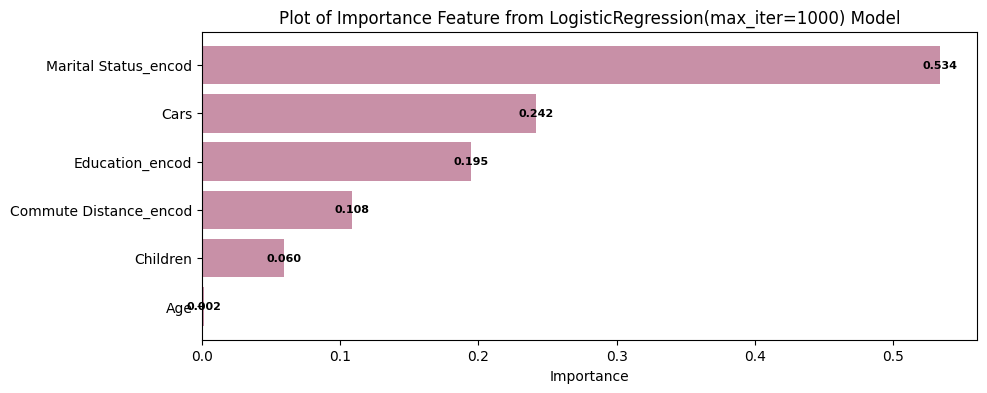

DATA: Original Dataframe
Columns: All Columns

Confusion Matrix:
[[100  36]
 [ 45  79]]

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       136
           1       0.69      0.64      0.66       124

    accuracy                           0.69       260
   macro avg       0.69      0.69      0.69       260
weighted avg       0.69      0.69      0.69       260


Cross Validation Score: 
[0.58571429 0.61428571 0.62857143 0.58571429 0.68571429 0.63768116
 0.63768116 0.53623188 0.62318841 0.66666667 0.73913043 0.63768116
 0.62318841 0.60869565 0.62318841]

Average: 0.629, Standard Deviation: 0.045





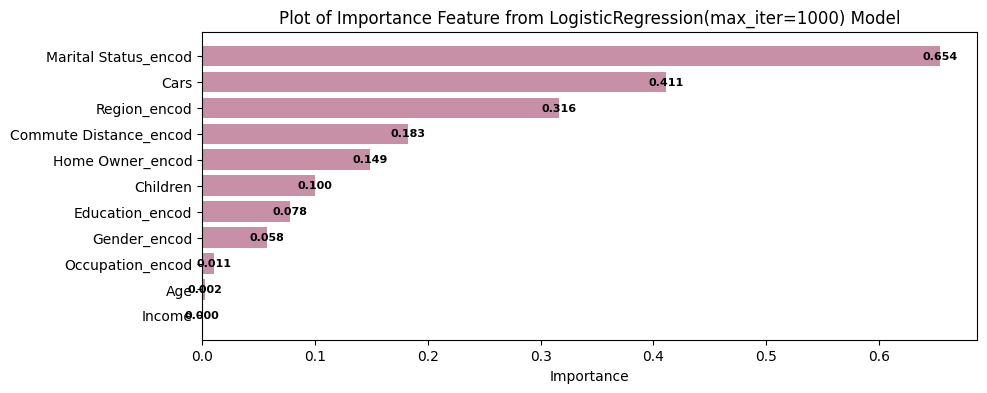

DATA: Winsorized Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[97 39]
 [48 76]]

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       136
           1       0.66      0.61      0.64       124

    accuracy                           0.67       260
   macro avg       0.66      0.66      0.66       260
weighted avg       0.67      0.67      0.66       260


Cross Validation Score: 
[0.62857143 0.57142857 0.71428571 0.62857143 0.65714286 0.65217391
 0.57971014 0.50724638 0.68115942 0.62318841 0.68115942 0.63768116
 0.5942029  0.63768116 0.5942029 ]

Average: 0.626, Standard Deviation: 0.05





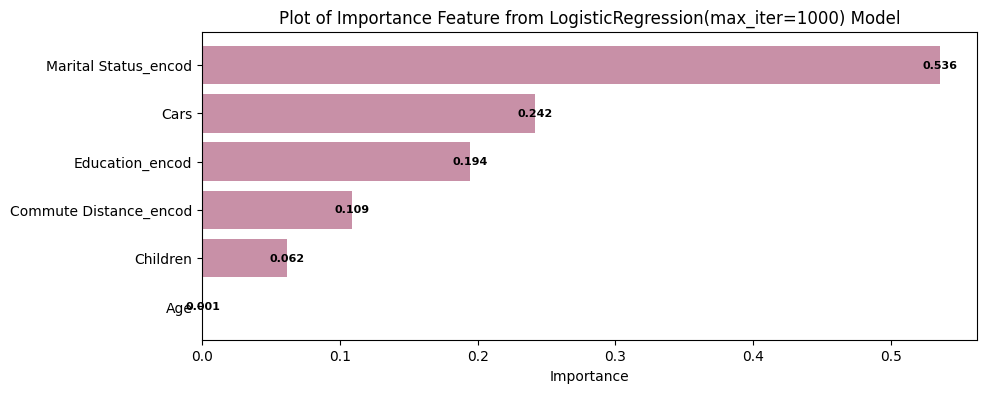

DATA: Winsorized Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[99 37]
 [44 80]]

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       136
           1       0.68      0.65      0.66       124

    accuracy                           0.69       260
   macro avg       0.69      0.69      0.69       260
weighted avg       0.69      0.69      0.69       260


Cross Validation Score: 
[0.58571429 0.62857143 0.62857143 0.6        0.68571429 0.5942029
 0.62318841 0.53623188 0.62318841 0.65217391 0.72463768 0.63768116
 0.62318841 0.60869565 0.60869565]

Average: 0.624, Standard Deviation: 0.042





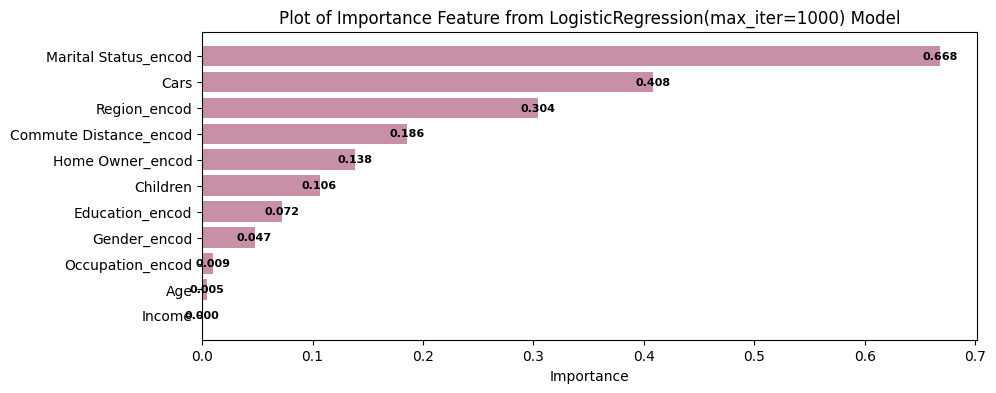

DATA: Inter Quartile Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[97 39]
 [49 75]]

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       136
           1       0.66      0.60      0.63       124

    accuracy                           0.66       260
   macro avg       0.66      0.66      0.66       260
weighted avg       0.66      0.66      0.66       260


Cross Validation Score: 
[0.62857143 0.57142857 0.7        0.62857143 0.65714286 0.65217391
 0.57971014 0.50724638 0.68115942 0.62318841 0.65217391 0.63768116
 0.5942029  0.63768116 0.60869565]

Average: 0.624, Standard Deviation: 0.046





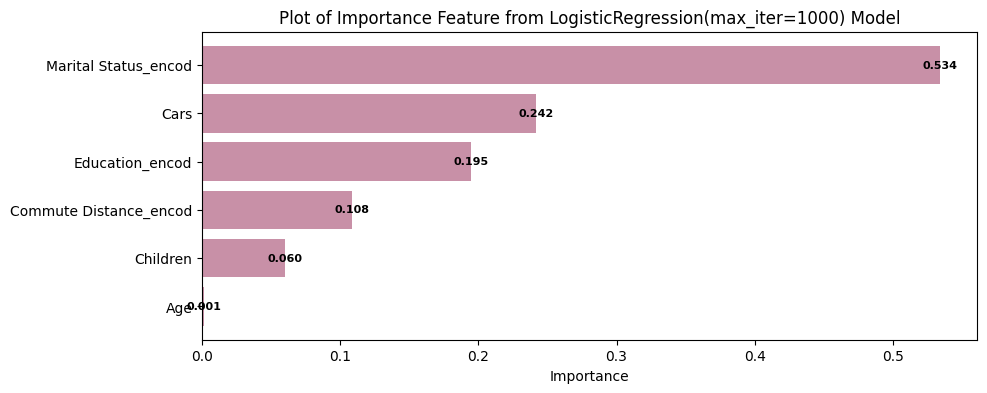

DATA: Inter Quartile Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[98 38]
 [45 79]]

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       136
           1       0.68      0.64      0.66       124

    accuracy                           0.68       260
   macro avg       0.68      0.68      0.68       260
weighted avg       0.68      0.68      0.68       260


Cross Validation Score: 
[0.58571429 0.61428571 0.62857143 0.6        0.68571429 0.62318841
 0.62318841 0.55072464 0.60869565 0.65217391 0.72463768 0.63768116
 0.63768116 0.60869565 0.62318841]

Average: 0.627, Standard Deviation: 0.039





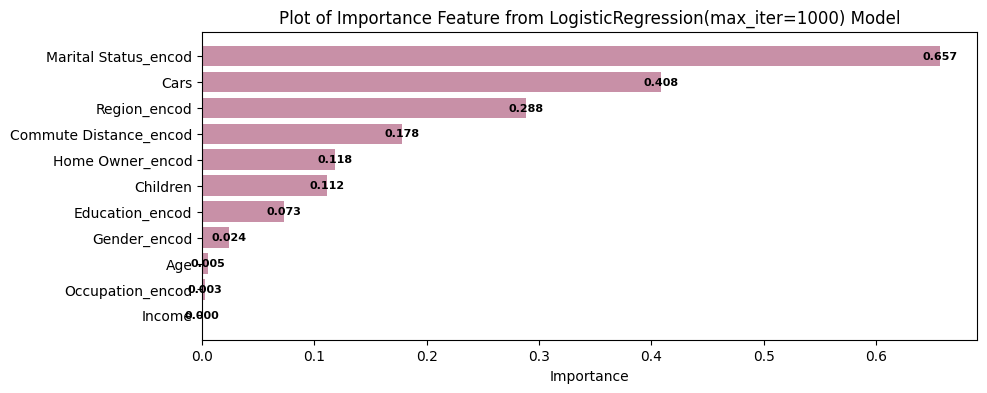

Model =  DecisionTreeClassifier() 


DATA: Original Dataframe
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[105  31]
 [ 32  92]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       136
           1       0.75      0.74      0.74       124

    accuracy                           0.76       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.76      0.76      0.76       260


Cross Validation Score: 
[0.7        0.84285714 0.68571429 0.77142857 0.68571429 0.75362319
 0.69565217 0.7826087  0.76811594 0.75362319 0.73913043 0.8115942
 0.69565217 0.73913043 0.75362319]

Average: 0.745, Standard Deviation: 0.045





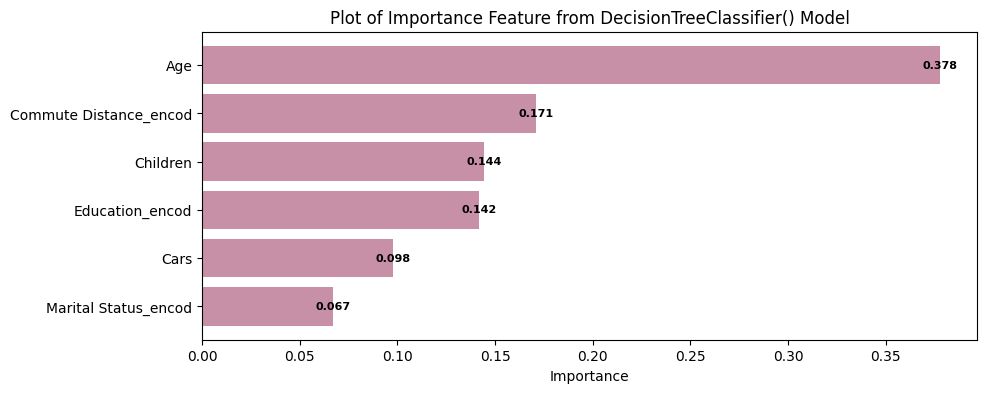

DATA: Original Dataframe
Columns: All Columns

Confusion Matrix:
[[115  21]
 [ 25  99]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       136
           1       0.82      0.80      0.81       124

    accuracy                           0.82       260
   macro avg       0.82      0.82      0.82       260
weighted avg       0.82      0.82      0.82       260


Cross Validation Score: 
[0.81428571 0.81428571 0.72857143 0.74285714 0.72857143 0.7826087
 0.79710145 0.7826087  0.7826087  0.7826087  0.72463768 0.82608696
 0.7826087  0.79710145 0.76811594]

Average: 0.777, Standard Deviation: 0.031





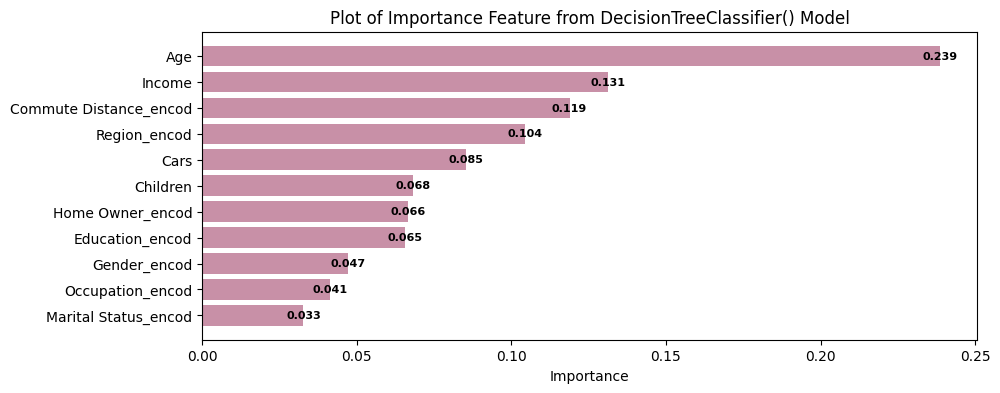

DATA: Winsorized Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[109  27]
 [ 35  89]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       136
           1       0.77      0.72      0.74       124

    accuracy                           0.76       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.76      0.76      0.76       260


Cross Validation Score: 
[0.67142857 0.82857143 0.67142857 0.74285714 0.68571429 0.69565217
 0.72463768 0.75362319 0.7826087  0.7826087  0.73913043 0.82608696
 0.71014493 0.73913043 0.7826087 ]

Average: 0.742, Standard Deviation: 0.049





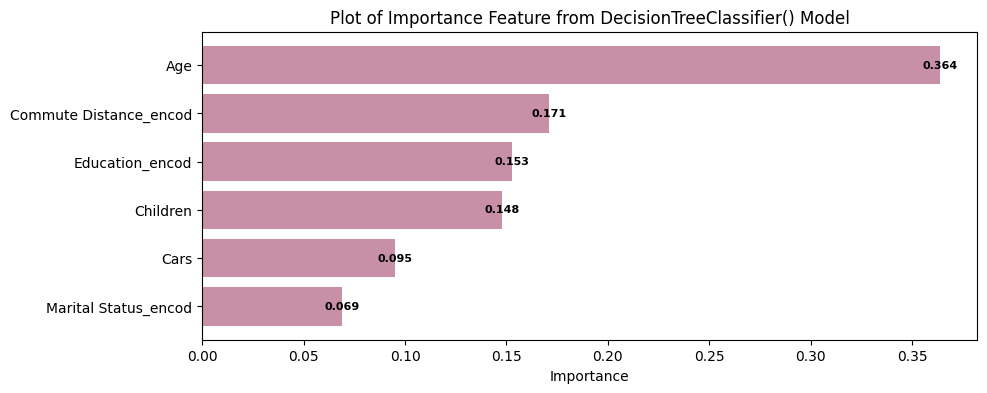

DATA: Winsorized Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[119  17]
 [ 26  98]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       136
           1       0.85      0.79      0.82       124

    accuracy                           0.83       260
   macro avg       0.84      0.83      0.83       260
weighted avg       0.84      0.83      0.83       260


Cross Validation Score: 
[0.81428571 0.81428571 0.68571429 0.74285714 0.67142857 0.79710145
 0.7826087  0.7826087  0.82608696 0.73913043 0.75362319 0.84057971
 0.73913043 0.7826087  0.79710145]

Average: 0.771, Standard Deviation: 0.047





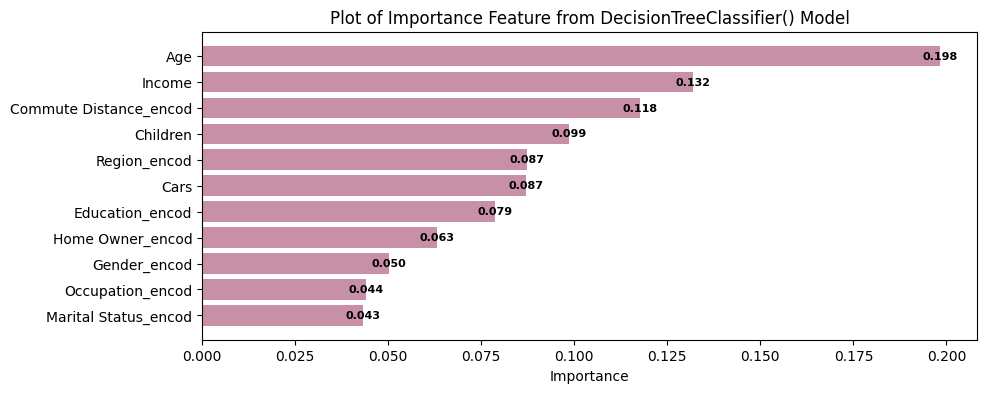

DATA: Inter Quartile Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[105  31]
 [ 32  92]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       136
           1       0.75      0.74      0.74       124

    accuracy                           0.76       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.76      0.76      0.76       260


Cross Validation Score: 
[0.7        0.82857143 0.67142857 0.77142857 0.67142857 0.69565217
 0.71014493 0.7826087  0.7826087  0.75362319 0.73913043 0.82608696
 0.71014493 0.73913043 0.73913043]

Average: 0.741, Standard Deviation: 0.048





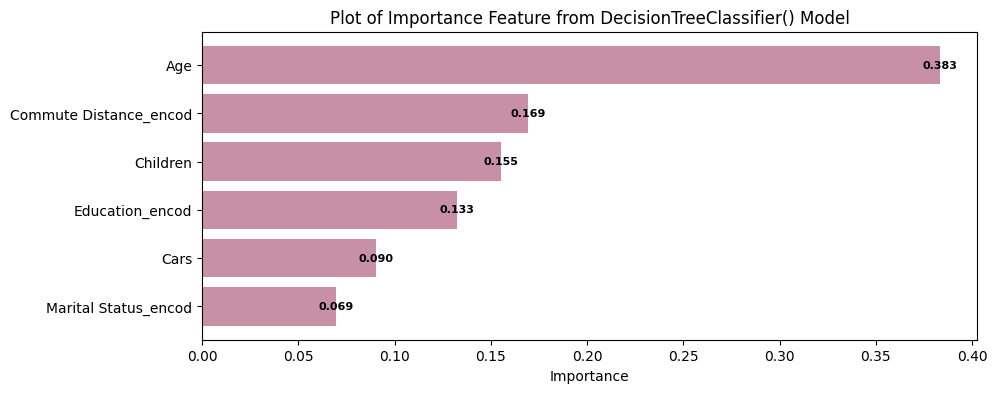

DATA: Inter Quartile Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[116  20]
 [ 26  98]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       136
           1       0.83      0.79      0.81       124

    accuracy                           0.82       260
   macro avg       0.82      0.82      0.82       260
weighted avg       0.82      0.82      0.82       260


Cross Validation Score: 
[0.8        0.78571429 0.71428571 0.72857143 0.72857143 0.7826087
 0.76811594 0.7826087  0.8115942  0.75362319 0.71014493 0.82608696
 0.7826087  0.79710145 0.76811594]

Average: 0.769, Standard Deviation: 0.034





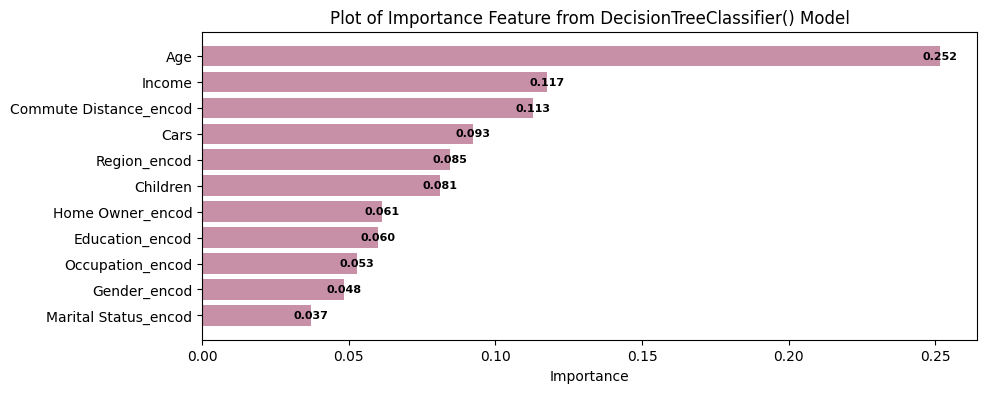

Model =  RandomForestClassifier() 


DATA: Original Dataframe
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[110  26]
 [ 26  98]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       136
           1       0.79      0.79      0.79       124

    accuracy                           0.80       260
   macro avg       0.80      0.80      0.80       260
weighted avg       0.80      0.80      0.80       260


Cross Validation Score: 
[0.77142857 0.85714286 0.77142857 0.74285714 0.72857143 0.69565217
 0.68115942 0.75362319 0.84057971 0.79710145 0.76811594 0.82608696
 0.71014493 0.7826087  0.72463768]

Average: 0.763, Standard Deviation: 0.05





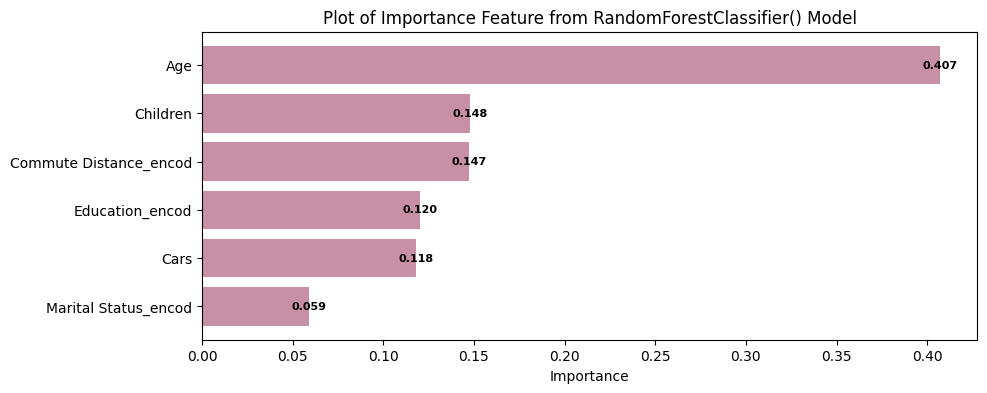

DATA: Original Dataframe
Columns: All Columns

Confusion Matrix:
[[118  18]
 [ 21 103]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       136
           1       0.85      0.83      0.84       124

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260


Cross Validation Score: 
[0.8        0.82857143 0.8        0.77142857 0.78571429 0.8115942
 0.73913043 0.8115942  0.86956522 0.82608696 0.75362319 0.85507246
 0.76811594 0.79710145 0.75362319]

Average: 0.798, Standard Deviation: 0.036





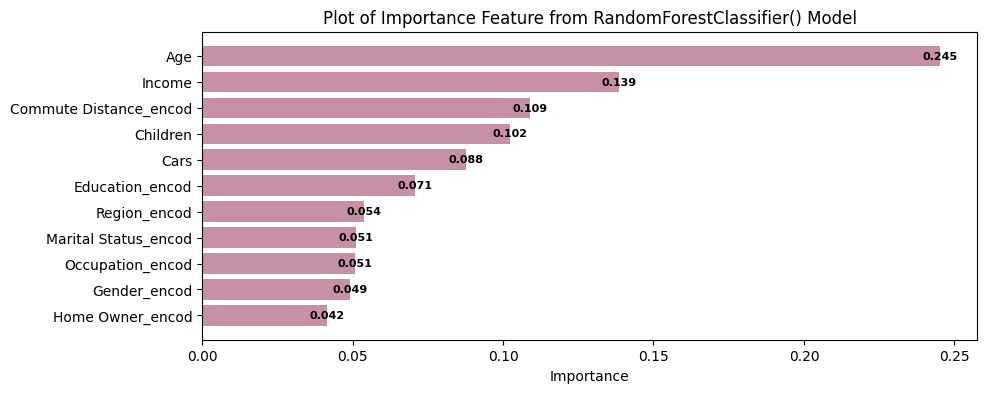

DATA: Winsorized Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[113  23]
 [ 25  99]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       136
           1       0.81      0.80      0.80       124

    accuracy                           0.82       260
   macro avg       0.82      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260


Cross Validation Score: 
[0.75714286 0.81428571 0.75714286 0.74285714 0.68571429 0.68115942
 0.68115942 0.75362319 0.85507246 0.79710145 0.7826087  0.8115942
 0.71014493 0.8115942  0.72463768]

Average: 0.758, Standard Deviation: 0.052





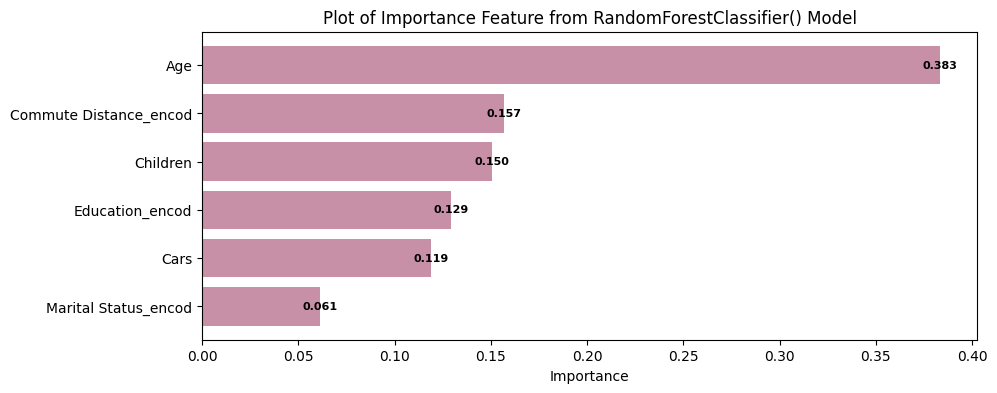

DATA: Winsorized Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[122  14]
 [ 24 100]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       136
           1       0.88      0.81      0.84       124

    accuracy                           0.85       260
   macro avg       0.86      0.85      0.85       260
weighted avg       0.86      0.85      0.85       260


Cross Validation Score: 
[0.81428571 0.82857143 0.8        0.8        0.77142857 0.7826087
 0.73913043 0.8115942  0.88405797 0.85507246 0.79710145 0.82608696
 0.76811594 0.8115942  0.7826087 ]

Average: 0.805, Standard Deviation: 0.035





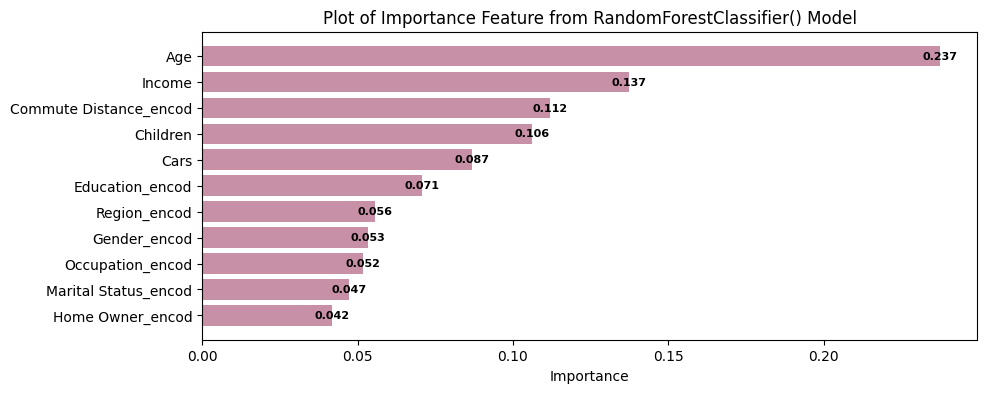

DATA: Inter Quartile Method Outlier Data Treatment
Columns: Columns with abs(corr) >= 0.1

Confusion Matrix:
[[110  26]
 [ 24 100]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       136
           1       0.79      0.81      0.80       124

    accuracy                           0.81       260
   macro avg       0.81      0.81      0.81       260
weighted avg       0.81      0.81      0.81       260


Cross Validation Score: 
[0.75714286 0.81428571 0.78571429 0.71428571 0.7        0.68115942
 0.66666667 0.76811594 0.85507246 0.8115942  0.7826087  0.79710145
 0.72463768 0.8115942  0.75362319]

Average: 0.762, Standard Deviation: 0.053





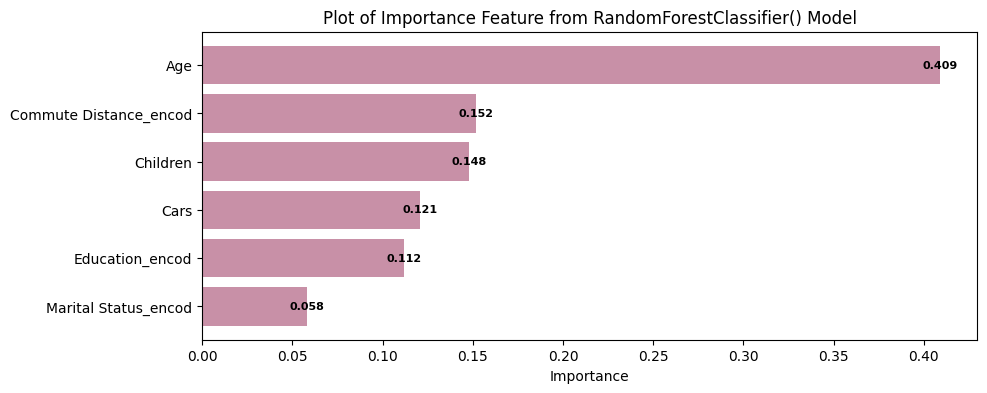

DATA: Inter Quartile Method Outlier Data Treatment
Columns: All Columns

Confusion Matrix:
[[117  19]
 [ 21 103]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       136
           1       0.84      0.83      0.84       124

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260


Cross Validation Score: 
[0.81428571 0.81428571 0.81428571 0.77142857 0.8        0.8115942
 0.7826087  0.79710145 0.86956522 0.8115942  0.75362319 0.82608696
 0.75362319 0.84057971 0.73913043]

Average: 0.8, Standard Deviation: 0.034





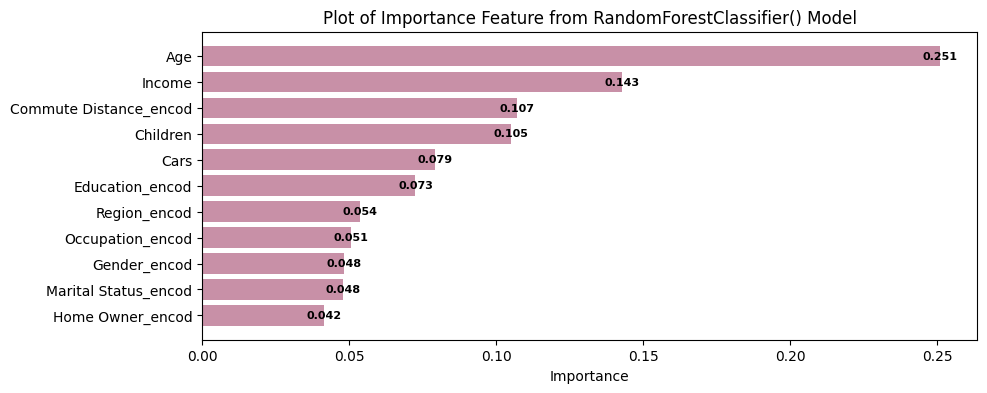

In [190]:
# @title Iterate Data Modelling
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warning
warnings.filterwarnings('ignore', category=ConvergenceWarning)




#for model in [lr, dtc, rfc]:
for model in [lr, dtc, rfc]:
  print(f'Model = \033[1;44;37m {str(model)} \033[0m\n\n')
  for data_selected, dataframe_selected in datas.items() :
    for par_selected, columns_selected in par_select.items():
      print(f'DATA\033[1m: {datas_map[data_selected]}\033[0m')
      print(f'Columns\033[1m: {par_select_map[par_selected]}\033[0m\n')

      # Split train and test data
      x_train, x_test, y_train, y_test = splitting_train_test(dataframe_selected, columns_selected)

      # Data Fitting
      model.fit(x_train, y_train)

      # Predict
      y_pred = model.predict(x_test)

      # Confusion Matrix
      print(f'\033[1mConfusion Matrix:\033[0m\n\033[43m{confusion_matrix(y_test, y_pred)}\033[0m\n')

      # Classification Report
      print(f'\033[1mClassification Report\033[0m\n{classification_report(y_test, y_pred)}\n')

      # Cross Validation
      scores = cross_val_score(model, x_train, y_train, cv=15)
      print(f'\033[1mCross Validation Score:\033[0m \n{scores}\n')
      print(f'\033[1mAverage:\033[0m {np.average(scores).round(3)}, \033[1mStandard Deviation:\033[0m {np.std(scores).round(3)}\n\n\n')

      # Important Features
      if model != lr:
        importances = pd.DataFrame(model.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=True)
      else:
        importances = pd.DataFrame(np.abs(model.coef_[0]), index=x_train.columns).sort_values(by=0, ascending=True)
      plt.figure(figsize=(10,4))
      barh_plot = plt.barh(importances.index, importances[0], color='#C890A7')
      plt.xlabel('Importance')
      plt.title(f'Plot of Importance Feature from {str(model)} Model')

      for bar in barh_plot:
        plt.text(
          bar.get_width(), bar.get_y() + bar.get_height()/2,
          f'{bar.get_width():.3f}',
          ha = 'center', va='center', color='black', fontsize=8, fontweight='bold'
          )
      plt.show()

# **Conclusion**

##Key Takeaways

The **Random Forest Classifier** shows as the top performer, becoming excellent predictive power with high accuracy score's of **85%** and balanced performance across precision, recall, and F1-score.

Gain cross validation average score **0.8** with standard deviation of **0.034**


The use of a full feature set contributed significantly to the model's pediction ability.

Age, income, and commute distance were identified as top three important features in predicting a user's likelihood to purchase a bike, with a notable emphasis on Commute Distance suggesting a targeted approach by the bike company toward urban commuters from the Upper-Middle-Class segment.

These findings provide valuable, data-driven insights that can help inform future product development, marketing strategies, and customer targeting approaches.

##In-Depth Findings

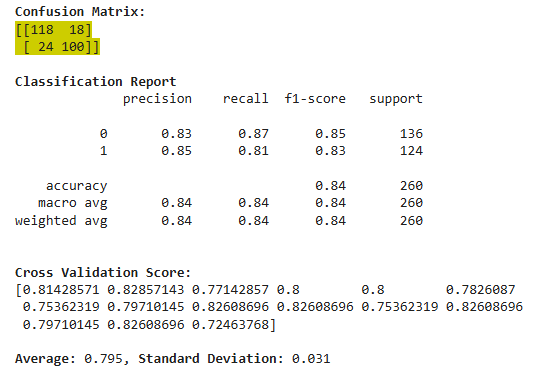

The model’s performance shows significant improvement due to the choice of algorithm, rather than focusing on handling outliers directly.

The **Random Forest Classifier** appear to be the best-performing model, achieving 84% accuracy, along with a weighted average of 84% across precision, recall, and F1-score. This indicates that the model is well-balanced in predicting both the True (yes/buy) and False (no/not buy) user decisions.

The model's consistency is highlighted by an average **cross-validation score** of 0.795 with a standard deviation of 0.03, suggesting a stable and reliable model performance across different subsets of data. This combination of a higher average score and lower standard deviation makes the model highly consistent.

Testing was conducted using a dataset of 360 rows, which included:
- 136 rows of 'No' (not buying) decisions
- 124 rows of 'Yes' (buying) decisions

Significance increase of model performance caused by algorithm and feature selection, rather than handling the outlier itself.

Best model achieved by using **Random Forest Classifier**, that shows 84% accuracy with weighted average of 84% for all precision, recall, f1-score. This model able to pretty balancely predict True (buy) and False (not but) value of user decision prediction.

Average score of cross validation of 0.795 and standard deviation of 0.03. This value asessed as the most consistent with higer average, and lower std.

Model testing done by using in total of 360 rows test dataset, consisting:
- 136 Test Data of 'No'
- 124 Test Data of 'Yes'


While outlier handling had a minor impact on improving performance, it was not as significant as the effects of algorithm and feature selection. The IQR (Interquartile Range) Limit Method with a k-factor of 1.5 resulted in the best performance for outlier treatment, demonstrating slight improvements.

Outlier handling using the Winsorization method with a 5% limit slightly reduced both the mean and standard deviation, but the changes were marginal, indicating that the outlier treatment did not substantially alter the overall model behavior.

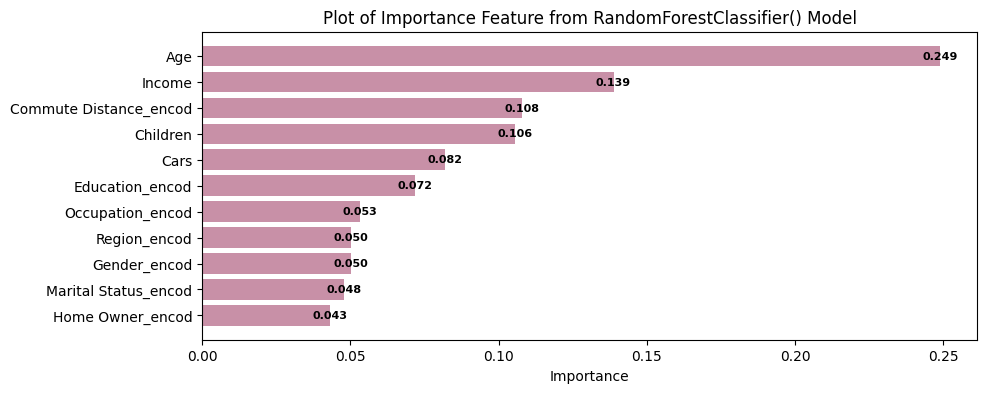

The feature importance analysis revealed that **Age** is the most influential parameter, with a score of 0.249, followed by Income with scores of 0.139 and Commute Distance with scores of 0.108.

The importance of Commute Distance strengthen earlier insights and indicates that it plays a key role in predicting user decisions. This aligns with the intuition that customers with longer commutes are more likely to invest in bikes for practical transportation purposes.

Given that income ranks as the second most important feature, it suggests that the bike company may be targeting an Upper-Middle-Class demographic, with a focus on middle-to-high price range products.

**Grand